In [655]:
import csv
import numpy as np
with open('2019_09_18_hdoost_h_MuchAdoAbout_all.csv', 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)



In [656]:
your_list[4]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'data in column - frac = fraction, data = normalized, score = protein score',
 '>sp|76764|gi|2494574|sp|P76299.1|FLHB_ECOLI RecName: Full=Flagellar biosynthetic protein FlhB',
 '>sp|77567|gi|109940070|sp|P17846.4|CYSI_ECOLI RecName: Full=Sulfite reductase [NADPH] hemoprotein beta-component; Short=SiR-HP; Short=SiRHP',
 '>sp|76949|gi|215275319|sp|P0C8J8.1|GATZ_ECOLI RecName: Full=D-tagatose-1,6-bisphosphate aldolase subunit GatZ',
 '>sp|76640|gi|3916038|sp|P78067.2|YNJE_ECOLI RecName: Full=Thiosulfate sulfurtransferase YnjE; Flags: Precursor',
 '>sp|77387|Nitrogen regulatory protein P-II [Escherichia coli Nissle 1917]',
 '>sp|75775|gi|7388460|sp|P75809.3|YBJI_ECOLI RecName: Full=5-amino-6-(5-phospho-D-ribitylamino)uracil phosphatase YbjI',
 '>sp|78237|gi|586675|sp|P37634.1|RLMJ_ECOLI RecName: Full=Ribosomal RNA large subunit methyltransferase J; AltName: Full=23S rRNA (adenine(2030)-N6)-methyltran

In [657]:
proteomics_dataframe = your_list[3:];
import pandas as pd
pd_proteomics_raw = pd.DataFrame(proteomics_dataframe,columns=your_list[3][0:19]+your_list[4][19:])


In [658]:
all_row_indices_against_score = list(pd_proteomics_raw['data_type']=='score');
all_row_indices_against_data = list(pd_proteomics_raw['data_type']=='data');
all_scores = [i for i, x in enumerate(all_row_indices_against_score) if x];
all_data = [i for i, x in enumerate(all_row_indices_against_score) if x];

#pd_proteomics_raw.iloc[all_scores,:]

In [659]:
#pd_proteomics=pd_proteomics_raw[pd_proteomics_raw['data_type']=='data']
#pd_proteomics.head(n=5)

In [660]:
matrix_proteomics = pd_proteomics_raw.as_matrix()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [694]:
matrix_proteomics.shape

(4202, 3995)

In [695]:
matrix_proteomics_col_condensed = [];
condensed_col_ind = [];
for col_ind in range(0,len(matrix_proteomics[0])):
    this_col = matrix_proteomics[:,col_ind];
    #print(this_row)
    num_non_zero_entries = np.sum([elem!='' for elem in this_col])
    #print(num_non_zero_entries)

    if col_ind<19:
        condensed_col_ind.append(col_ind);
        matrix_proteomics_col_condensed.append(this_col);
    if col_ind>=19: 
        try:
            mean_score = np.mean( np.asarray(matrix_proteomics[all_row_indices_against_score,col_ind],dtype=np.float32))

            if num_non_zero_entries>=4200 and mean_score>60.0: 
                condensed_col_ind.append(col_ind);
                matrix_proteomics_col_condensed.append(this_col);
        except:
            'missing data'
            

matrix_proteomics_col_condensed = np.asarray(matrix_proteomics_col_condensed).T

print(matrix_proteomics_col_condensed.shape)
column_headers = list(pd_proteomics.columns[condensed_col_ind])
temp_data_frame = pd.DataFrame(matrix_proteomics_col_condensed,columns=column_headers)
temp_data_frame =temp_data_frame[temp_data_frame['data_type']=='data']
matrix_proteomics_col_condensed = temp_data_frame.as_matrix();

(4202, 52)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [705]:
matrix_proteomics_row_condensed = [];
for row_ind in range(0,len(matrix_proteomics_col_condensed)):
    this_row = matrix_proteomics_col_condensed[row_ind,:];
    #print(this_row)
    num_non_zero_entries = np.sum([elem!='' for elem in this_row])
    print(num_non_zero_entries)
    if num_non_zero_entries>=51:
        matrix_proteomics_row_condensed.append(this_row);
matrix_proteomics_row_condensed = np.asarray(matrix_proteomics_row_condensed)

        

52
52
52
52
52
52
52
47
47
52
52
52
52
52
52
52
52
52
47
47
52
52
52
52
52
52
52
47
52
47
52
52
52
52
52
52
47
47
52
52
52
52
52
52
52
52
52
47
47
52
52
52
52
52
52
52
52
47
47
52
52
52
52
52
52
52
47
47
52
52
52
52
52
52
52
47
52
52
52
47
47
47
51
51
51
51
51
51
51
51
47
47
52
52
52
52
52
52
52
52
47
47
51
51
51
51
51
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
52
52
52
52
52
52
52
52
47
47
51
51
51
51
51
51
51
51
47
51
51
51
51
51
51
51
51
47
47
47
51
51
51
51
51
51
51
51
47
47
52
52
51
52
52
51
51
51
47
47
51
51
51
51
51
51
51
51
47
51
51
51
51
51
47
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
52
52
51
52
52
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
52
51
51
52
52
51
52
51
47
52
52
52
52
47
52
52
52
52
47
51
51
51
51
51
51
51
51
47
47
47
52
51
52
51
51
52
51
52
47
47
51
51
51
51
51
51
51
51
47
47
51
51
51
51
51
51
51
51
47
47
51
51
51
51
51
51
51
51
47
51
51
51
51
51
51
51
51
47
47
51
51
5

In [706]:
pd_proteomics.columns[condensed_col_ind]

Index(['sample_id', 'IPTG_concentration', 'IPTG_unit', 'TMT_channel',
       'agave_path', 'arabinose_concentration', 'arabinose_unit',
       'control_type', 'experiment_id', 'file_type', 'measurement_type', 'raw',
       'replicate', 'strain', 'temperature', 'temperature_unit', 'timepoint',
       'timepoint_unit', 'data_type',
       '>sp|78064|LSU ribosomal protein L2p (L8e) [Escherichia coli Nissle 1917]',
       '>sp|72146|NAD-dependent glyceraldehyde-3-phosphate dehydrogenase [Escherichia coli Nissle 1917]',
       '>sp|76056|gi|124171|sp|P08200.1|IDH_ECOLI RecName: Full=Isocitrate dehydrogenase [NADP]; Short=IDH; AltName: Full=IDP; AltName: Full=NADP(+)-specific ICDH; AltName: Full=Oxalosuccinate decarboxylase',
       '>sp|35691|P0A9Q8',
       '>sp|75841|SSU ribosomal protein S1p [Escherichia coli Nissle 1917]',
       '>sp|75407|gi|67473482|sp|P0A850.1|TIG_ECOLI RecName: Full=Trigger factor; Short=TF; AltName: Full=PPIase',
       '>sp|78087|Translation elongation factor G [

In [707]:
print(matrix_proteomics_col_condensed.shape)


(1400, 52)


In [708]:
matrix_proteomics_row_condensed[1][0:20]

array(['sample.ginkgo.12068911', '0.000623441', 'M', 'TMT10-130N',
       '/uploads/ginkgo/201811/Novelchassis-Nand-Gate/exp9812-130-ds8557767-proteins.csv',
       '0.062344', 'M', 'EMPTY_VECTOR', 'experiment.ginkgo.18256.18257',
       'CSV', 'PROTEOMICS',
       "{'_id': ObjectId('5bee125189f10442ca0f7eb3'), 'agave_path': '/uploads/ginkgo/201811/Novelchassis-Nand-Gate/exp9812-130-ds8557767-proteins.csv', 'agave_system': 'data-sd2e-community', 'challenge_problem': 'NOVEL_CHASSIS', 'control_type': 'EMPTY_VECTOR', 'experiment_id': 'experiment.ginkgo.18256.18257', 'experiment_reference': 'Exp-NC-NAND-Gate-Iteration', 'experiment_reference_url': 'https://docs.google.com/document/d/13QqYqzp4bBXMCHFiX2PNqrYOL0iegXk1hBgEcAeQ4BI', 'file_type': 'CSV', 'filename': '/uploads/ginkgo/201811/Novelchassis-Nand-Gate/exp9812-130-ds8557767-proteins.csv', 'file_uuid': '105124e9-9ec9-5f64-aa52-808a5288160a', 'hpc_path': '/work/projects/SD2E-Community/prod/data/uploads/ginkgo/201811/Novelchassis-Nand-Gat

In [709]:

column_headers = list(pd_proteomics.columns[condensed_col_ind])#+list(matrix_proteomics_row_condensed[0][20:]);
dataframe_condensed = pd.DataFrame(matrix_proteomics_row_condensed[2:],columns=column_headers)
dataframe_condensed =dataframe_condensed[dataframe_condensed['data_type']=='data']
print(dataframe_condensed.columns[0:21])
dataframe_condensed.head(n=40)
#dataframe_condensed.columns= ['sample_id','IPTG_concentration','IPTG_unit','TMT_channel','agave_path','arabinose_concentration','arabinose_unit','control_type','experiment_id','file_type','measurement_type','raw','replicate','strain','temperature','temperature_unit','timepoint','timepoint_unit']+['']

Index(['sample_id', 'IPTG_concentration', 'IPTG_unit', 'TMT_channel',
       'agave_path', 'arabinose_concentration', 'arabinose_unit',
       'control_type', 'experiment_id', 'file_type', 'measurement_type', 'raw',
       'replicate', 'strain', 'temperature', 'temperature_unit', 'timepoint',
       'timepoint_unit', 'data_type',
       '>sp|78064|LSU ribosomal protein L2p (L8e) [Escherichia coli Nissle 1917]',
       '>sp|72146|NAD-dependent glyceraldehyde-3-phosphate dehydrogenase [Escherichia coli Nissle 1917]'],
      dtype='object')


,sample_id,IPTG_concentration,IPTG_unit,TMT_channel,agave_path,arabinose_concentration,arabinose_unit,control_type,experiment_id,file_type,...,>sp|72154|gi|129056|sp|P06959.3|ODP2_ECOLI RecName: Full=Dihydrolipoyllysine-residue acetyltransferase component of pyruvate dehydrogenase complex; AltName: Full=Dihydrolipoamide acetyltransferase component of pyruvate dehydrogenase complex; AltName: Full=E2,>sp|78681|gi|67472405|sp|P0A8T7.1|RPOC_ECOLI RecName: Full=DNA-directed RNA polymerase subunit beta'; Short=RNAP subunit beta'; AltName: Full=RNA polymerase subunit beta'; AltName: Full=Transcriptase subunit beta',>sp|78680|DNA-directed RNA polymerase beta subunit [Escherichia coli Nissle 1917],>sp|72161|Enolase [Escherichia coli Nissle 1917],>sp|78050|SSU ribosomal protein S5p (S2e) [Escherichia coli Nissle 1917],>sp|78830|Heat shock protein 60 family chaperone GroEL [Escherichia coli Nissle 1917],>sp|75887|gi|71159605|sp|P0A910.1|OMPA_ECOLI RecName: Full=Outer membrane protein A; AltName: Full=Outer membrane protein II*; Flags: Precursor,>sp|78048|gi|132681|sp|P02413.1|RL15_ECOLI RecName: Full=50S ribosomal protein L15,>sp|78673|elongation factor Tu [Escherichia coli Nissle 1917],>sp|78086|elongation factor Tu [Escherichia coli Nissle 1917]
0,sample.ginkgo.12068898,0.0,0,TMT10-126,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.0,0,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,62009.52875159648,182435.93270370128,271573.54970155435,209165.23809489465,203501.6011910927,221172.5411415324,389479.0578500321,180175.18736844172,375711.88957460993,375711.88957460993
1,sample.ginkgo.12068899,0.0,0,TMT10-127C,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.0,0,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,16913.75705452655,49004.07108862212,74301.19345799988,55477.823697668304,52906.748864246336,60315.19327766789,100210.87335843897,48929.77654501048,104424.9913930516,104424.9913930516
2,sample.ginkgo.12068903,0.000623441,M,TMT10-129C,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.0,0,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,28024.124294437755,84816.49227156595,128272.17498687144,92818.15317514155,99317.46750178751,109914.94839787127,182974.1863385692,84024.58571715745,172529.41837095888,172529.41837095888
3,sample.ginkgo.12068906,0.0,0,TMT10-127N,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.062344,M,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,33950.94715304964,102826.9559716026,153065.52784664134,109486.56077776478,108473.20637230505,120875.38857333474,197540.75404174754,98163.78926285153,205182.26674399388,205182.26674399388
4,sample.ginkgo.12068907,0.0,0,TMT10-128N,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.062344,M,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,23738.278622683803,68510.16145745544,101438.3762172785,76059.96489453274,74607.48798006392,91335.50172474043,128957.28079836685,67012.44995755653,144996.64002720272,144996.64002720272
5,sample.ginkgo.12068902,0.000623441,M,TMT10-128C,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.0,0,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,40905.05123727565,127813.62123253143,192236.55340914274,135316.72320650247,144165.98609701253,160867.51079886488,269635.46208954876,125920.94496305515,259724.80431754468,259724.80431754468
6,sample.ginkgo.12068920,0.000623441,M,TMT10-128C,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.0,0,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,129705.15675085451,337670.7063455666,436320.47397979855,202928.02973307561,324564.31986814336,275815.30044208333,659222.2779574931,286202.91572321445,349414.83104506484,349414.83104506484
7,sample.ginkgo.12068929,0.000623441,M,TMT10-130N,/uploads/ginkgo/201811/Novelchassis-Nand-Gate/...,0.062344,M,EMPTY_VECTOR,experiment.ginkgo.18256.18257,CSV,...,112064.74915476976,283968.2349607473,374970.69698030996,170476.10129566747,287731.87231349945,230664.07018627477,599916.7745338855,249005.66712431444,285573.05968098104,285573.05968098104
8,sample.ginkgo

In [710]:
all_strains = list(set(dataframe_condensed['strain']))
all_strains
#print(this_strain)

['MG1655_empty_landing_pads',
 'MG1655_pTACmin',
 'MG1655_pJS007_LALT__backbone',
 'MG1655_pJS007_LALT__P3__PhlF',
 'MG1655_pBADmin',
 'MG1655_WT',
 'MG1655_NAND_Circuit',
 'MG1655_IcaR_Gate',
 'MG1655_pJS007_LALT__I1__IcaRA',
 'MG1655_PhlF_Gate']

In [711]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [712]:
all_strains = list(set(dataframe_condensed['strain']))
for this_strain in all_strains[0:2]:
    this_data = dataframe_condensed[dataframe_condensed['strain']==this_strain].as_matrix()
    t_numeric_data = this_data[:,19:];
    print(this_data.shape)

(112, 52)
(112, 52)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [713]:
import matplotlib.pyplot as plt 

In [714]:
print(len(dataframe_condensed))
all_gene_names = dataframe_condensed.columns[19:]
all_gene_names = [elem.split('|')[-1].strip('\[Escherichia coli Nissle 1917\]') for elem in all_gene_names];
gene_colors = np.random.rand(3,len(all_gene_names))

1118


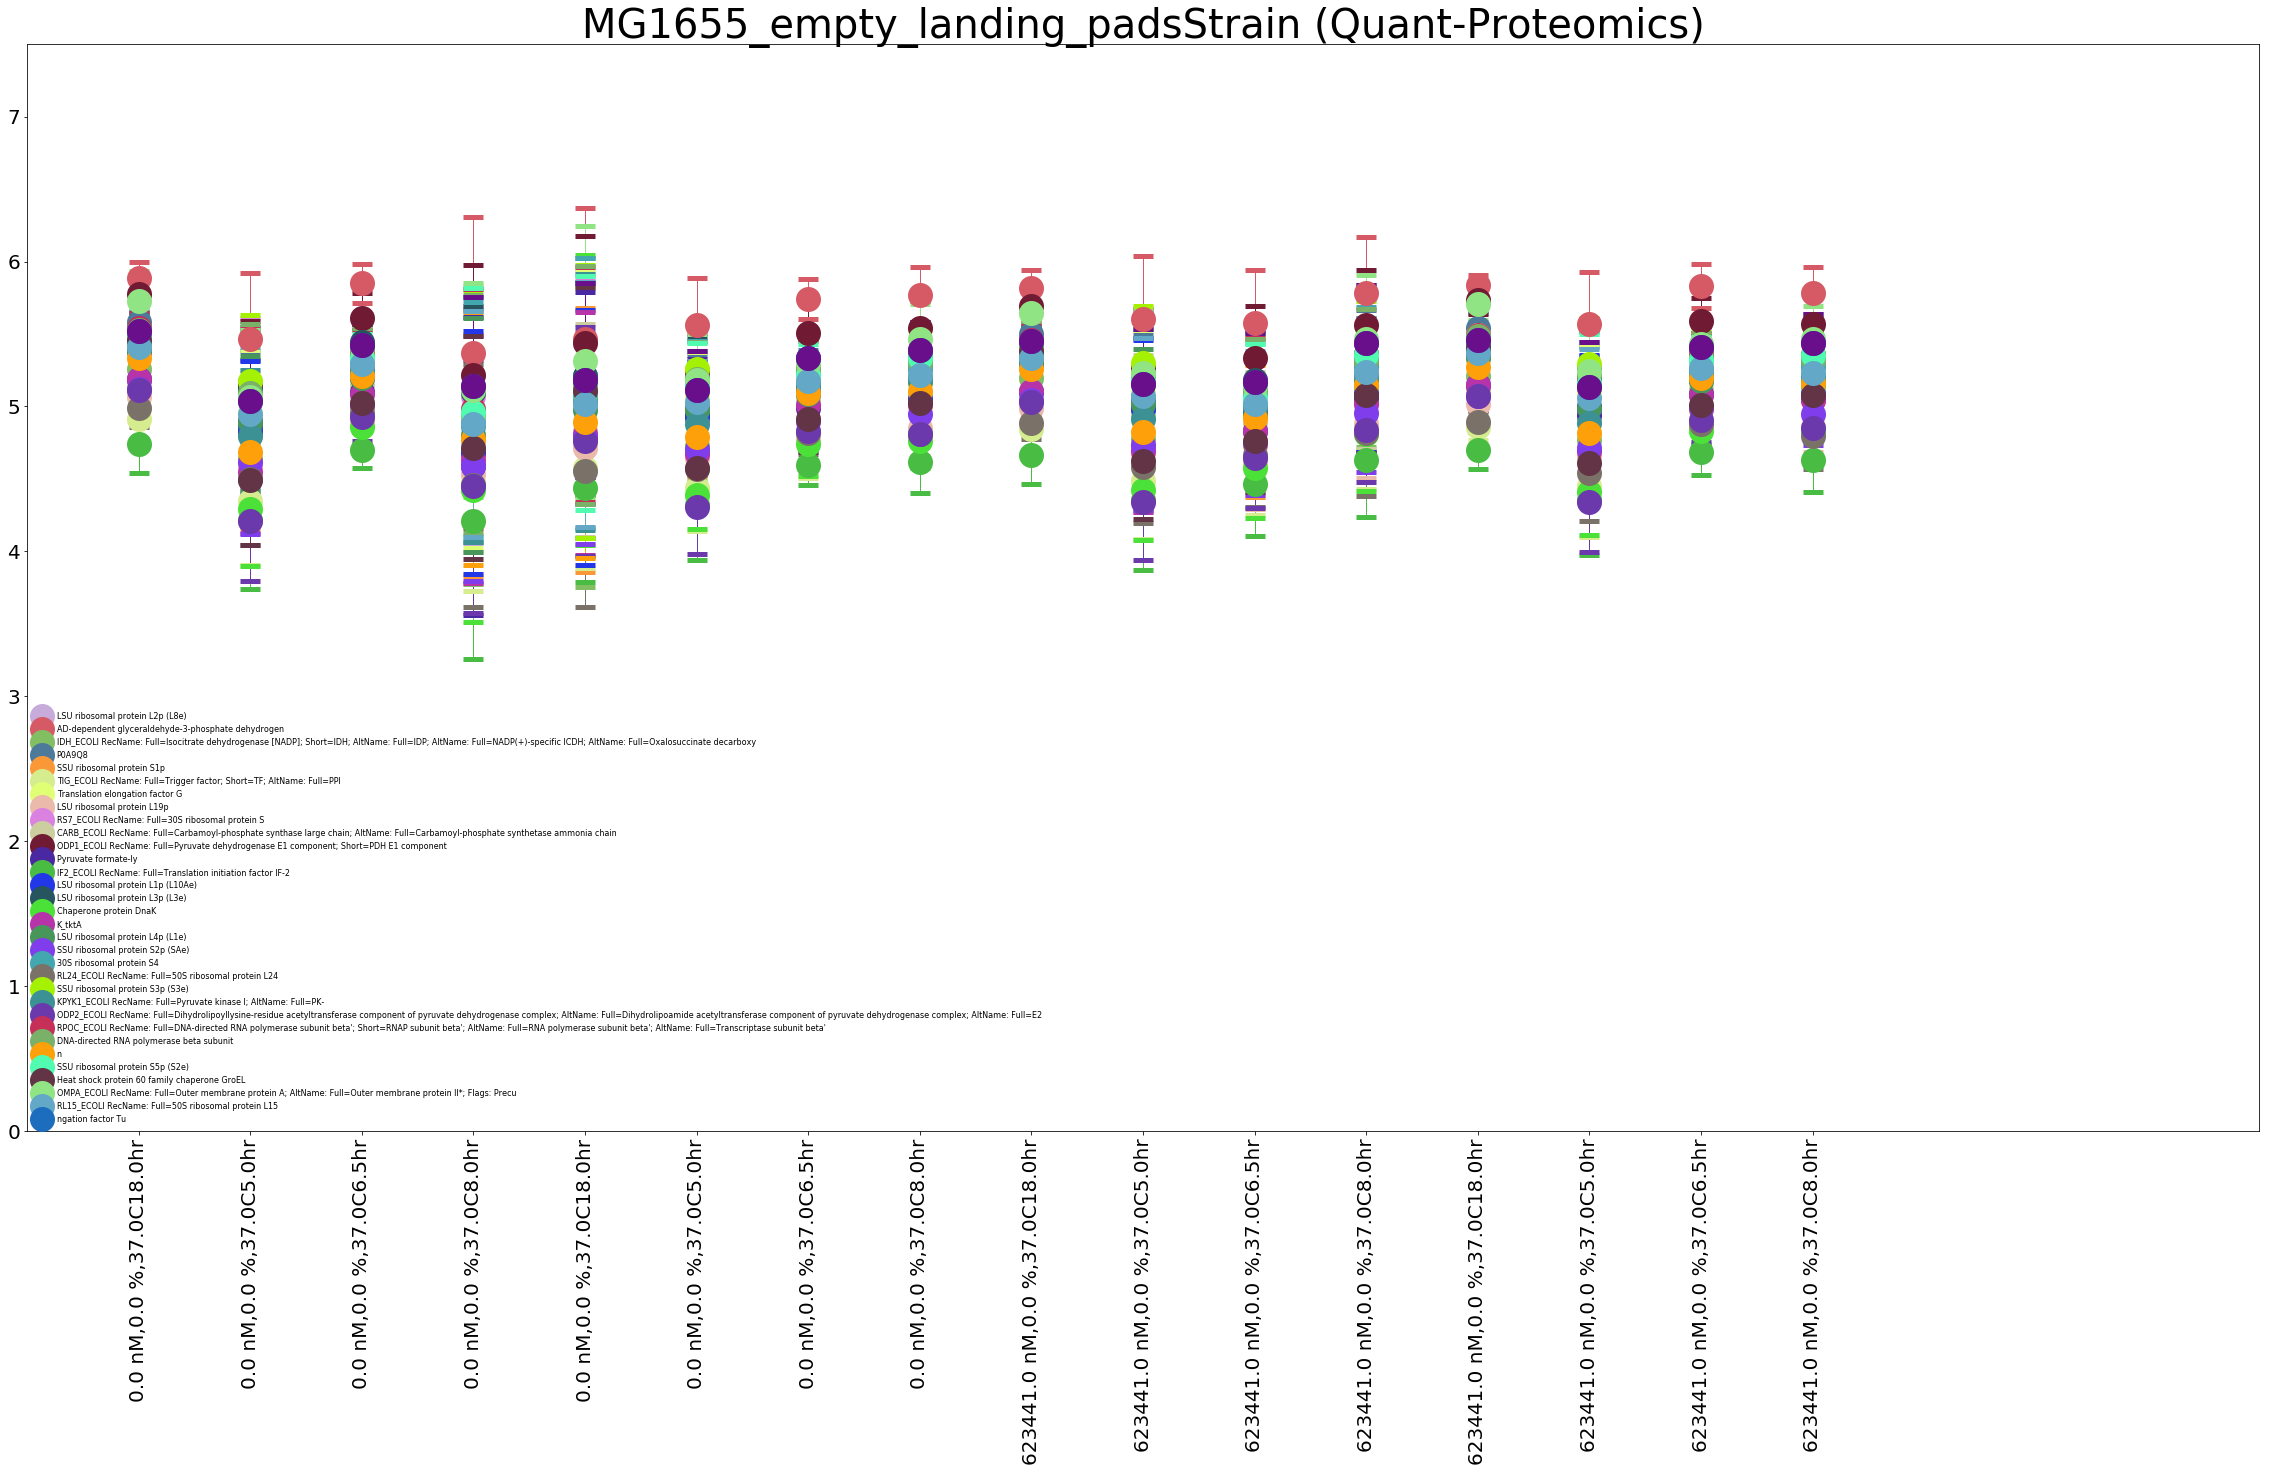

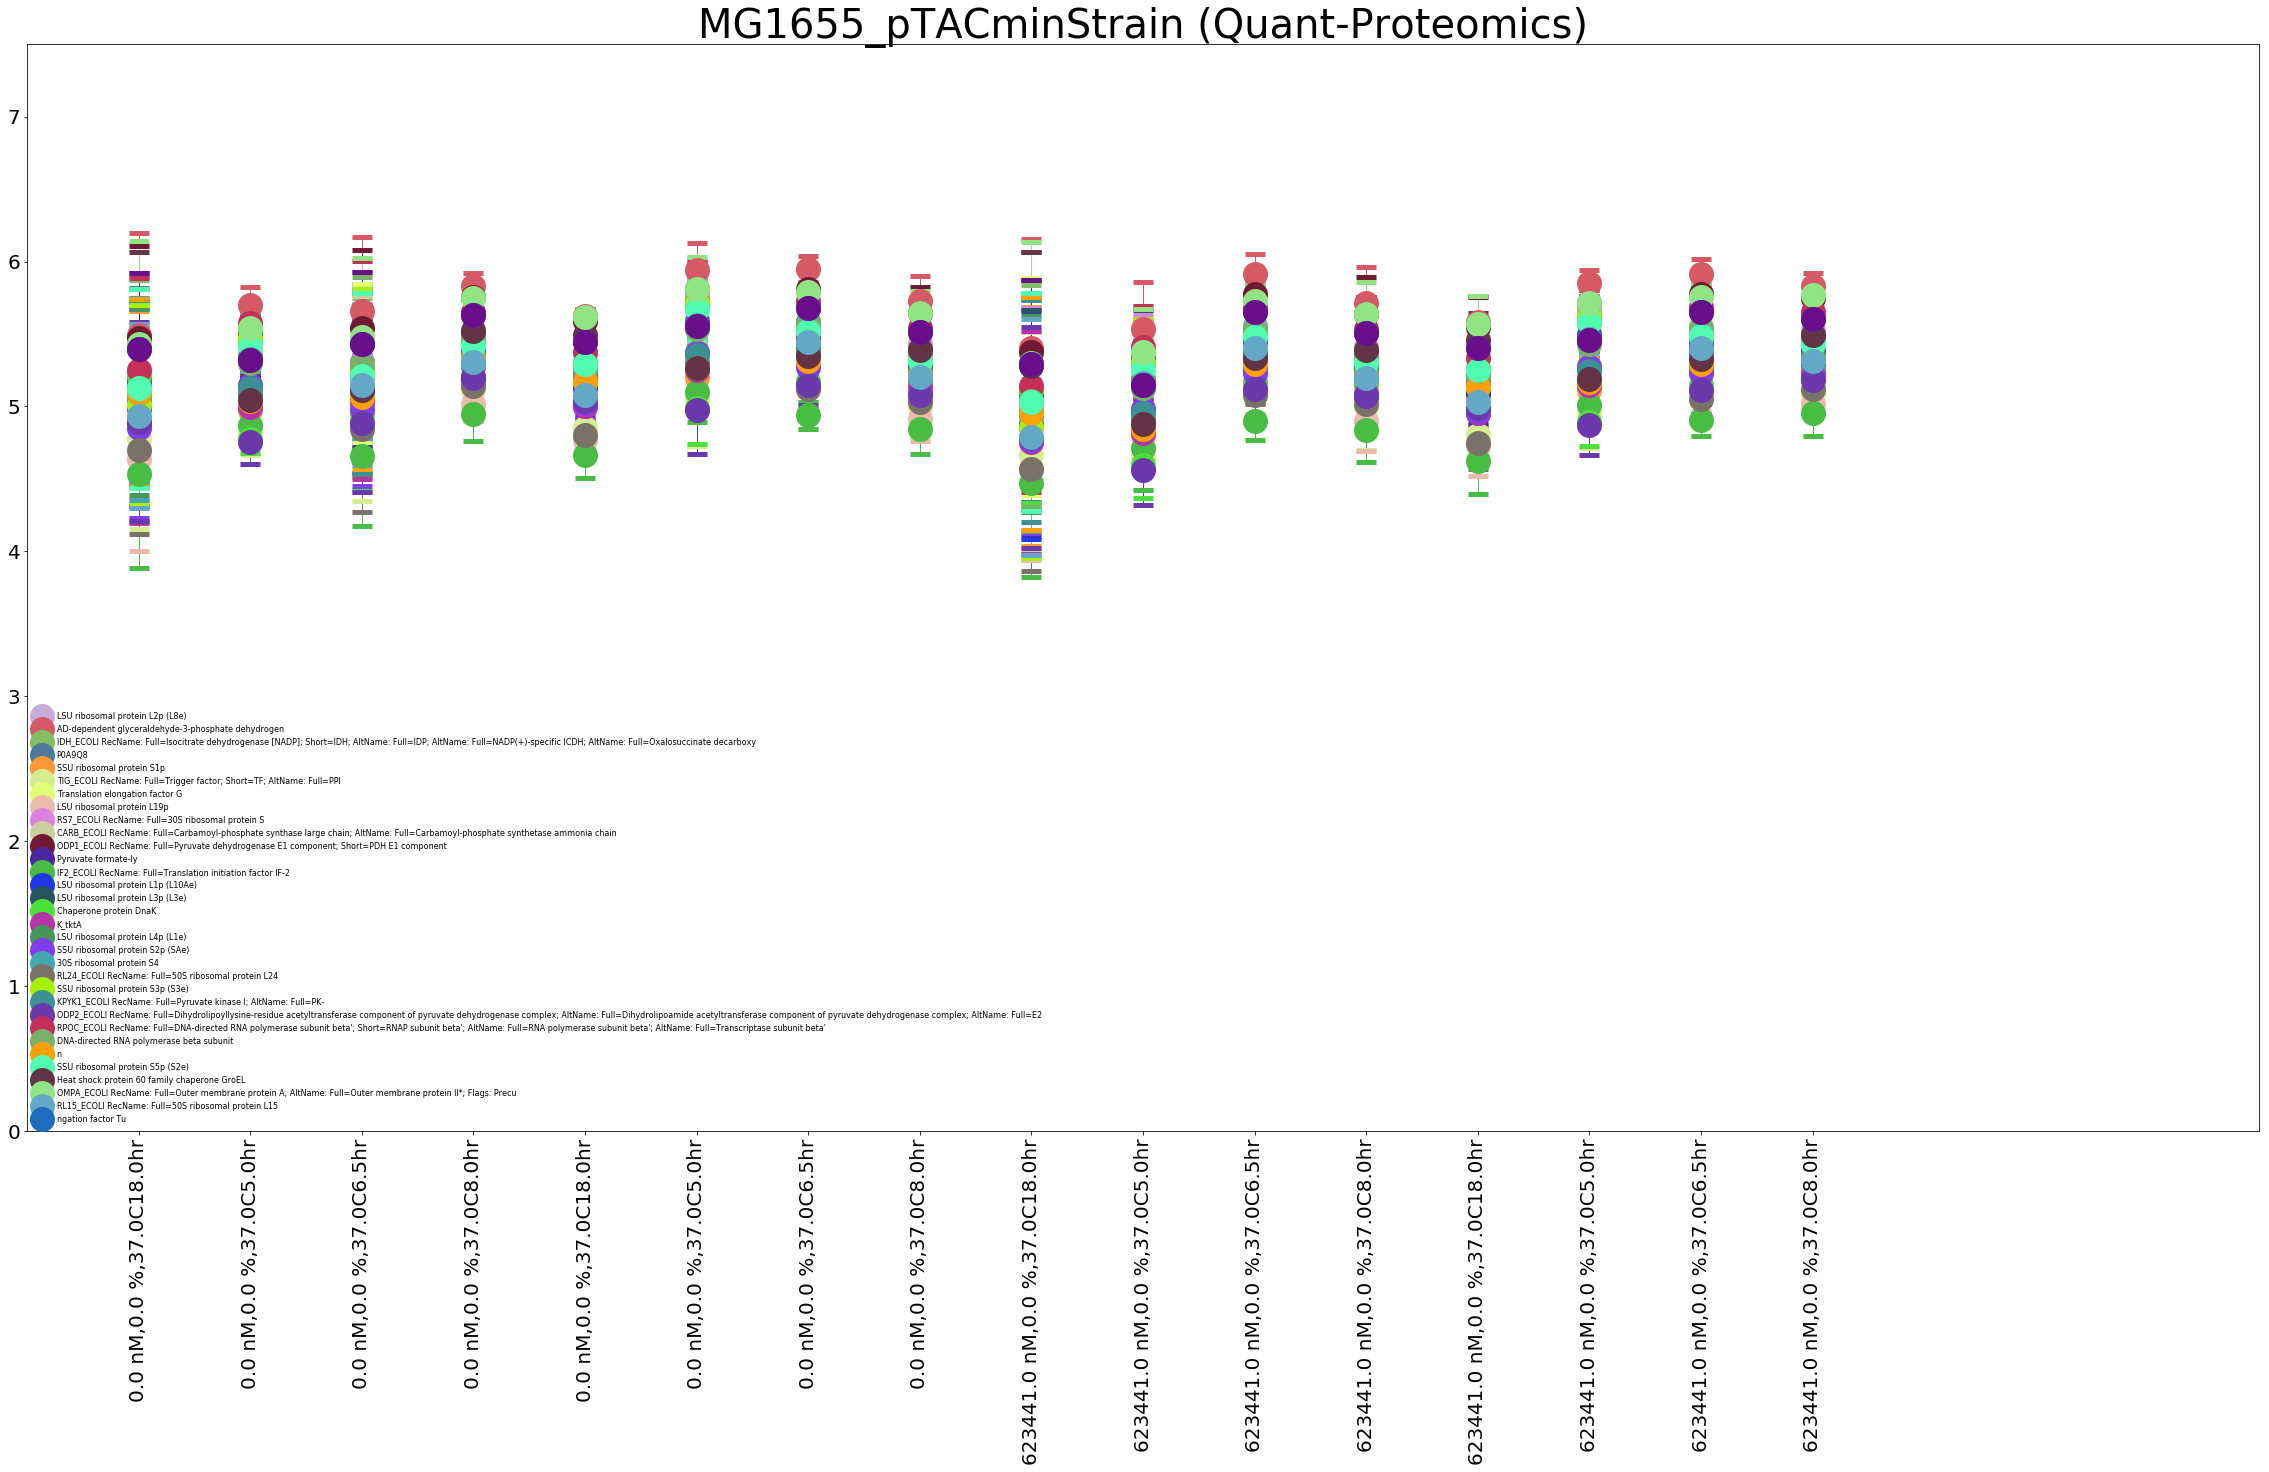

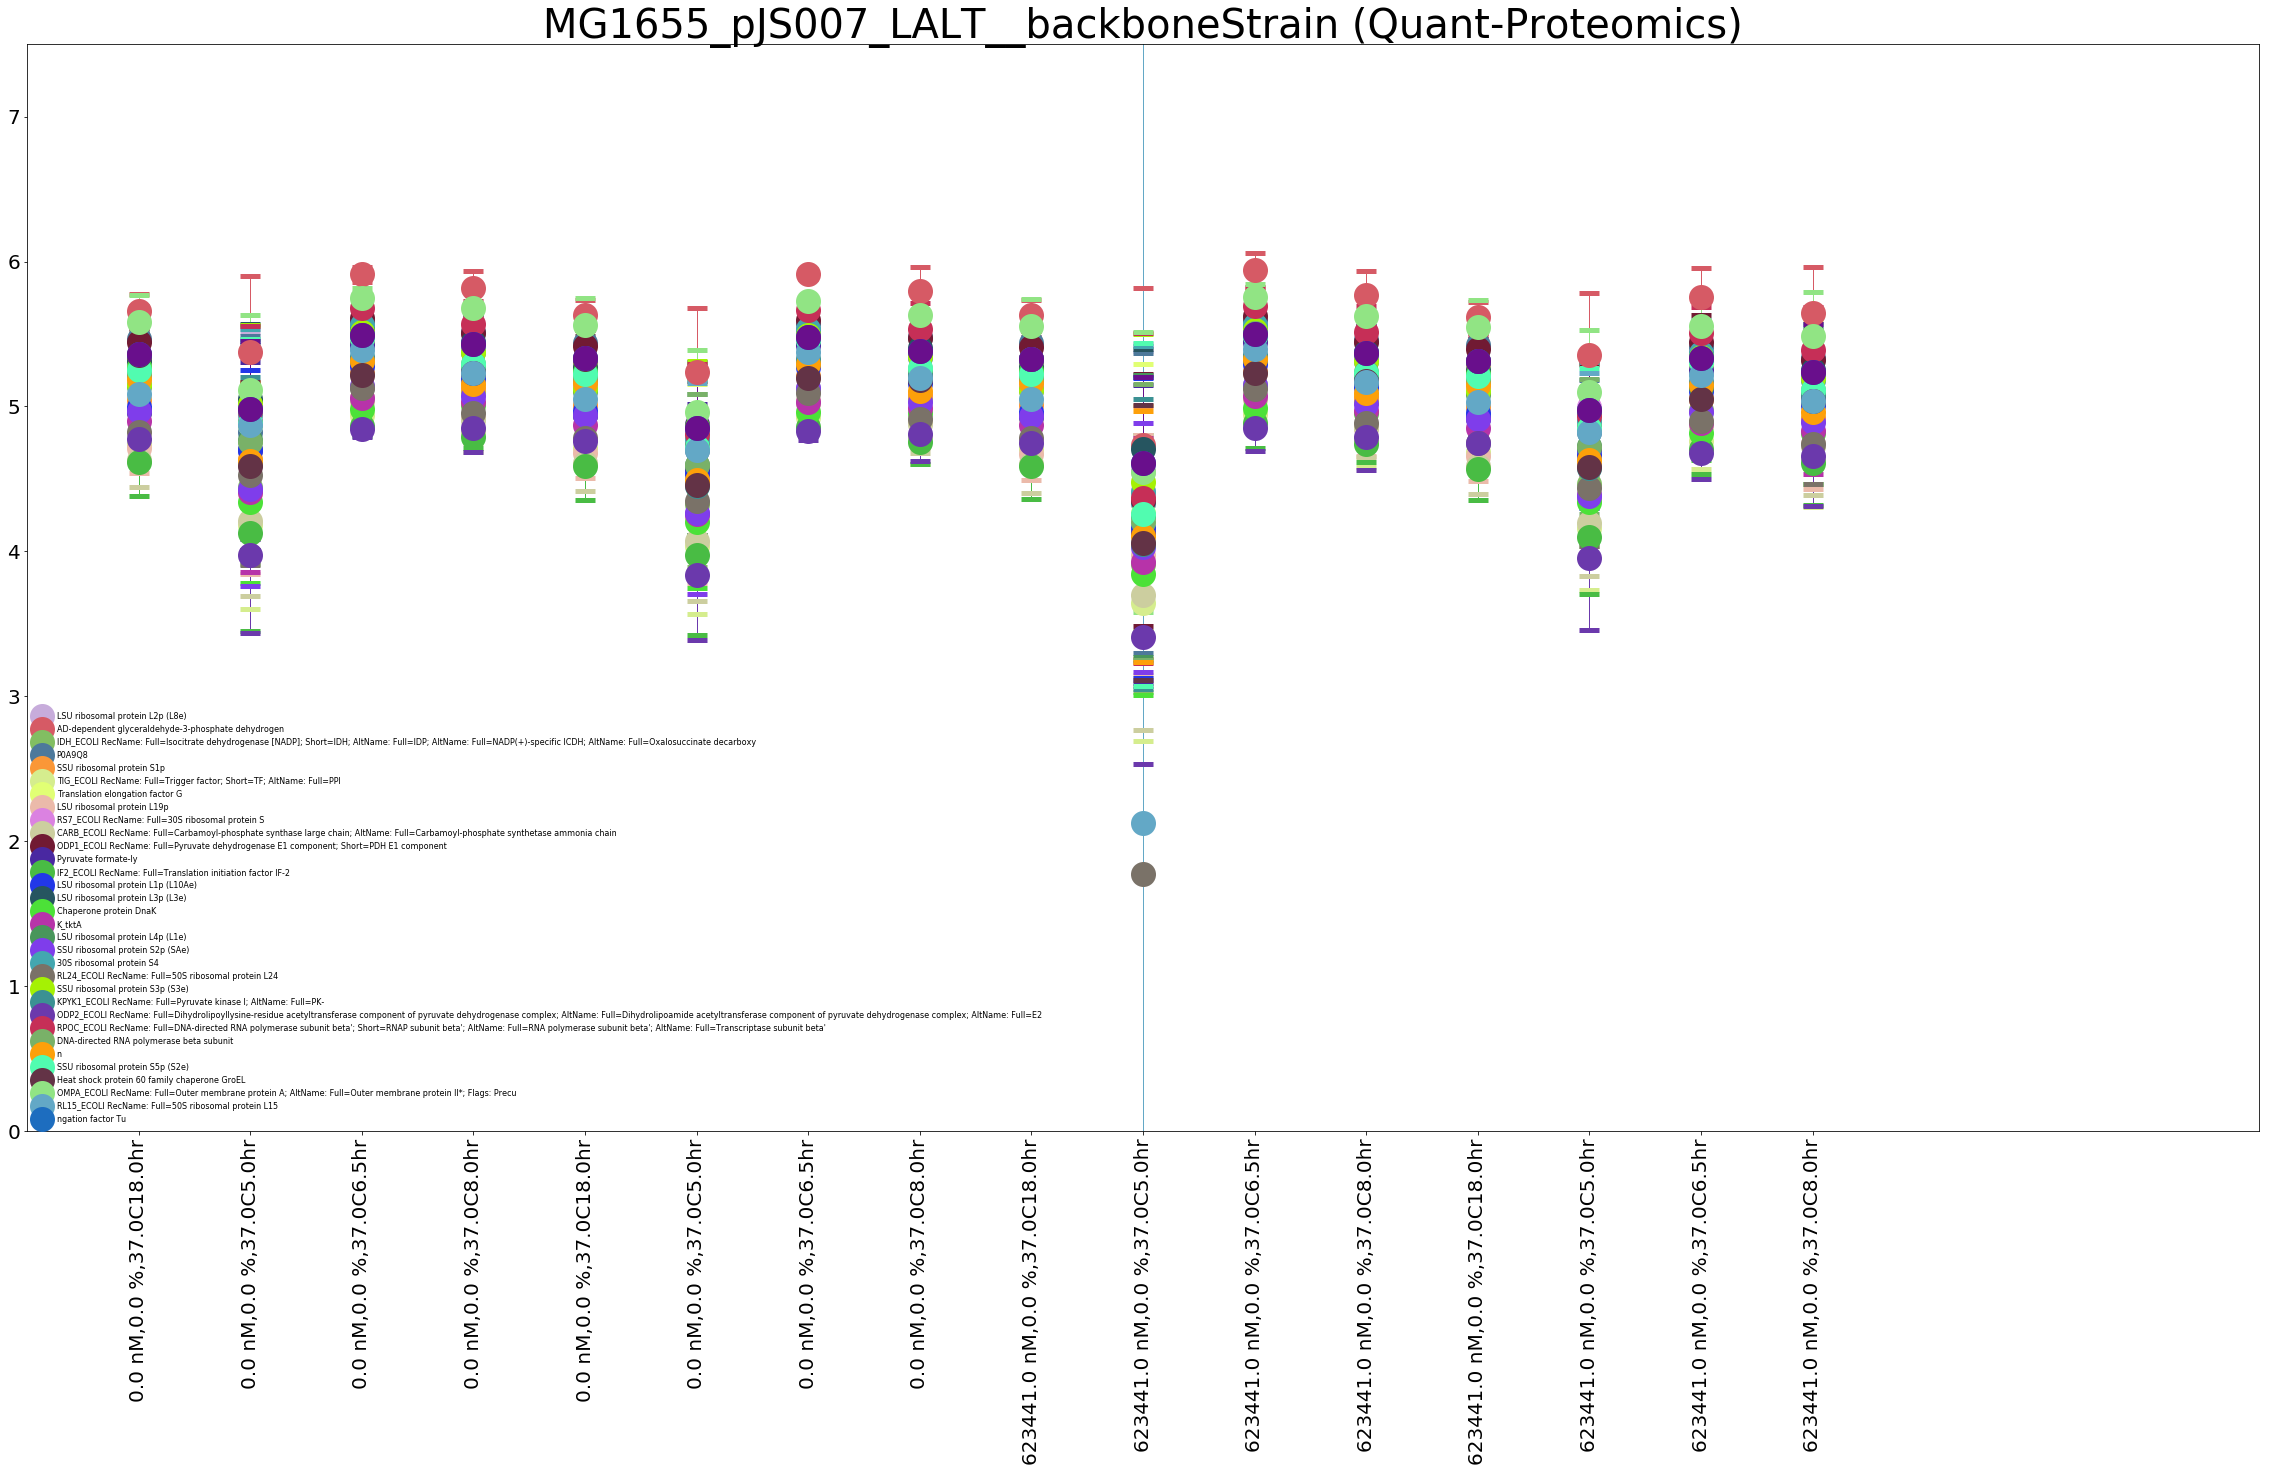

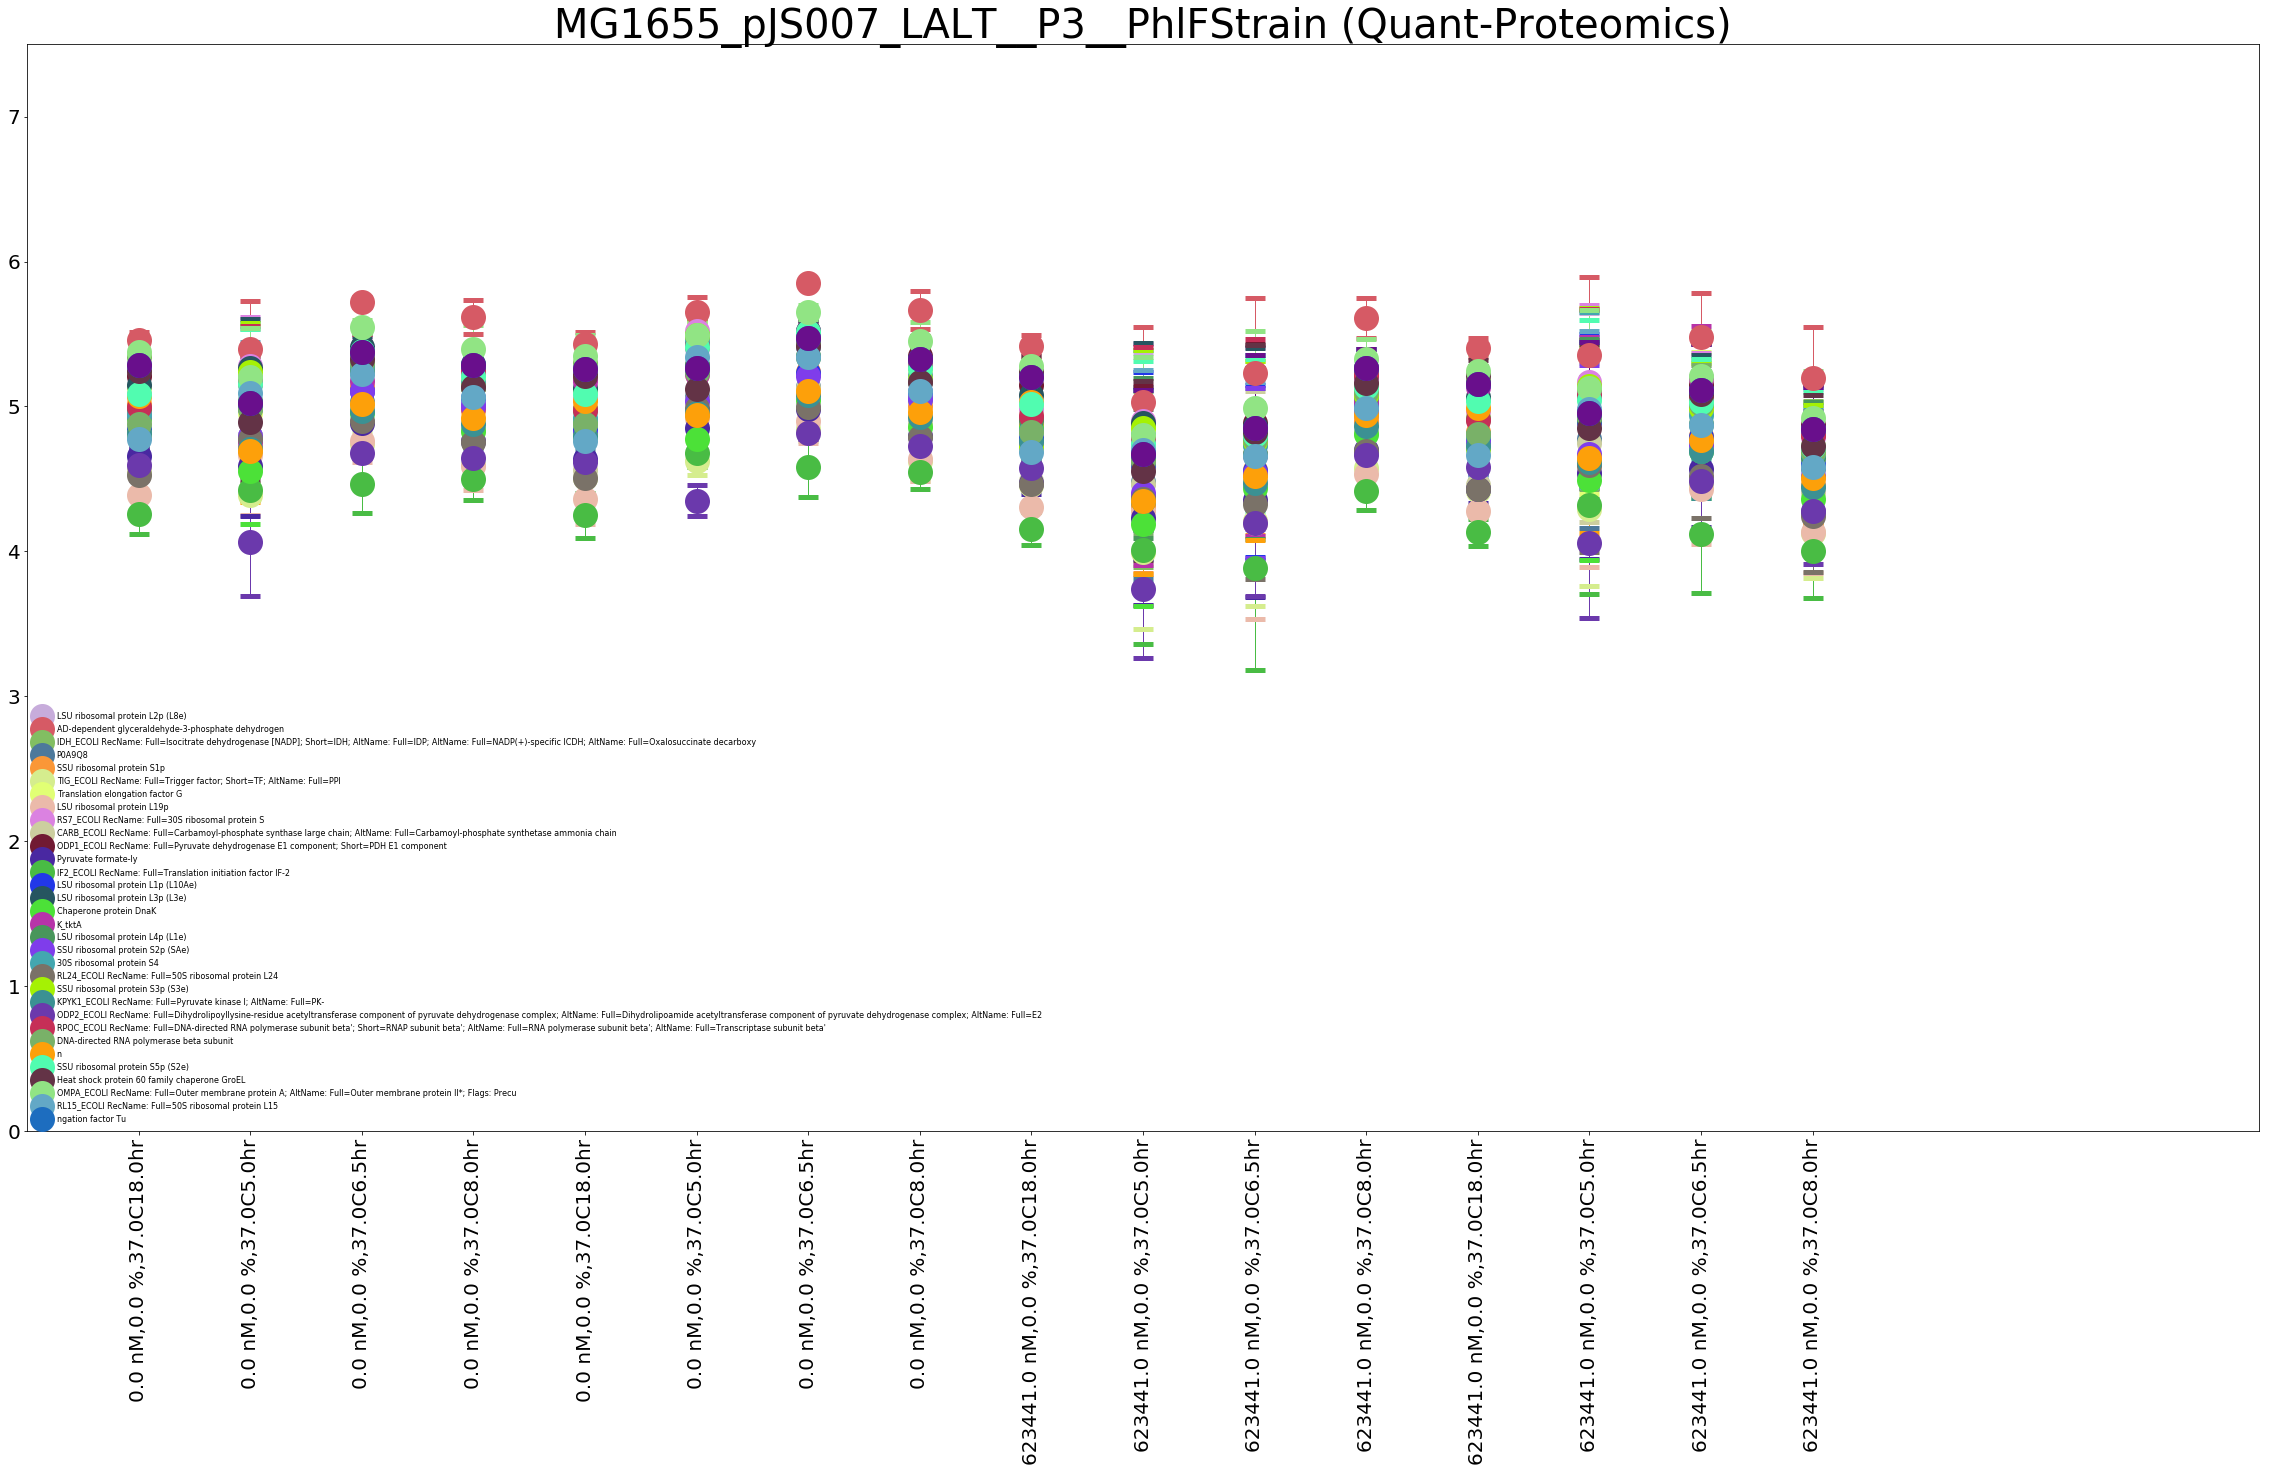

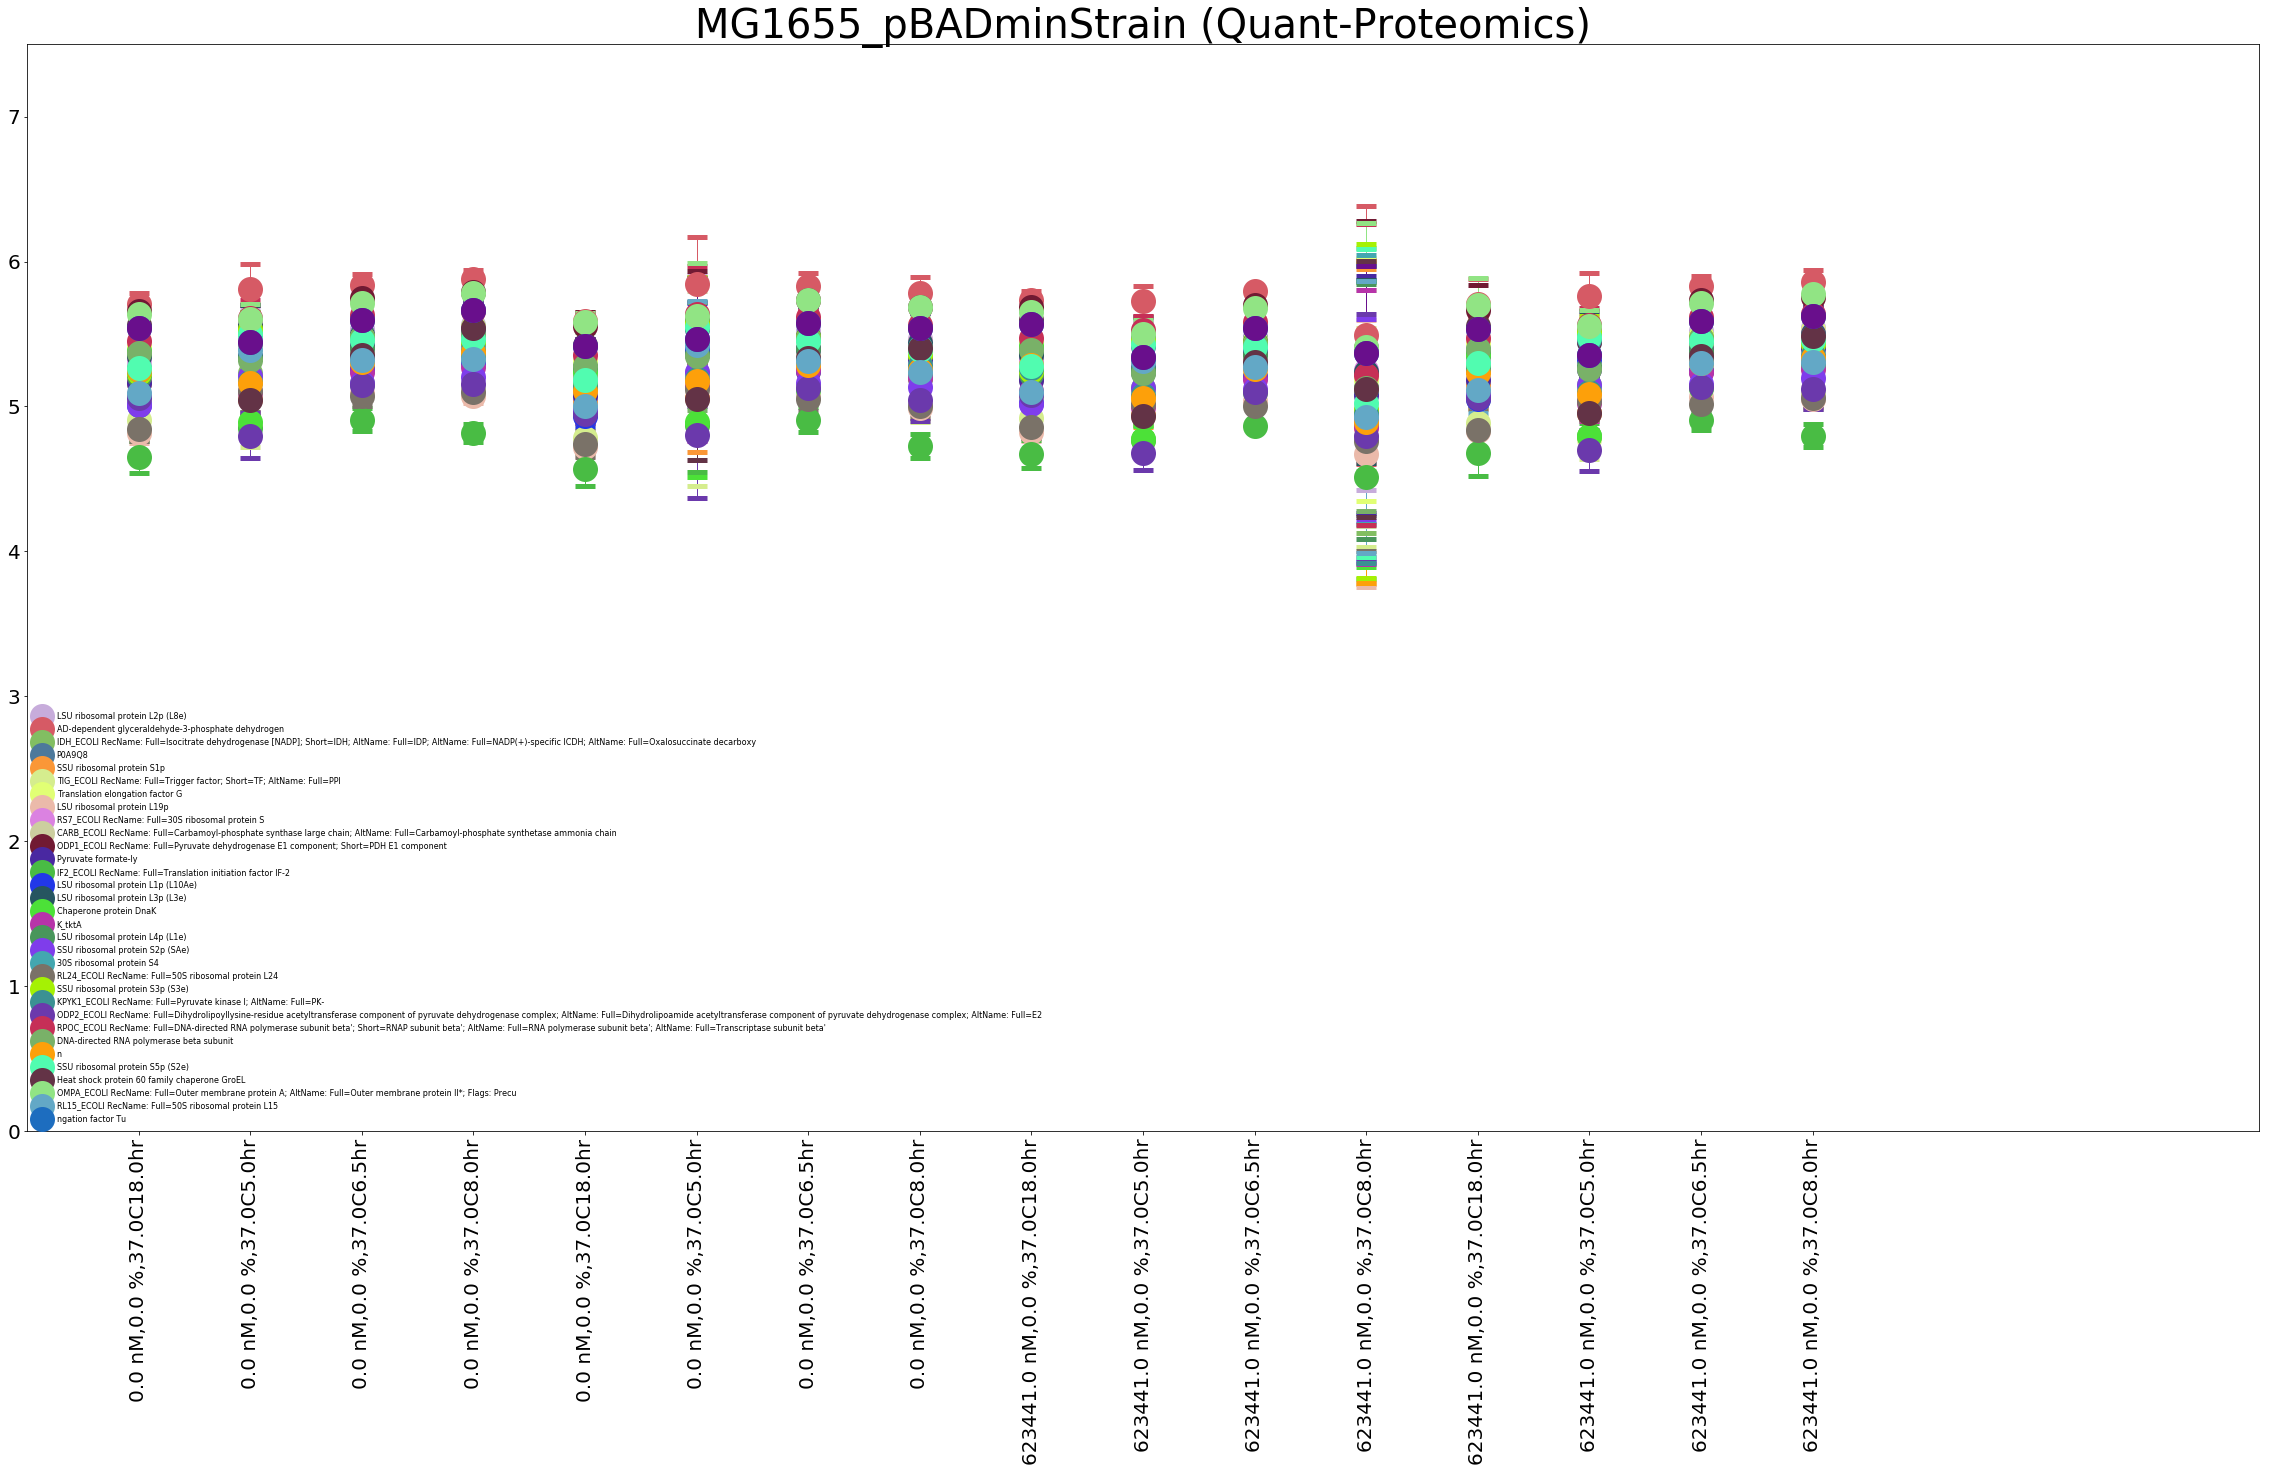

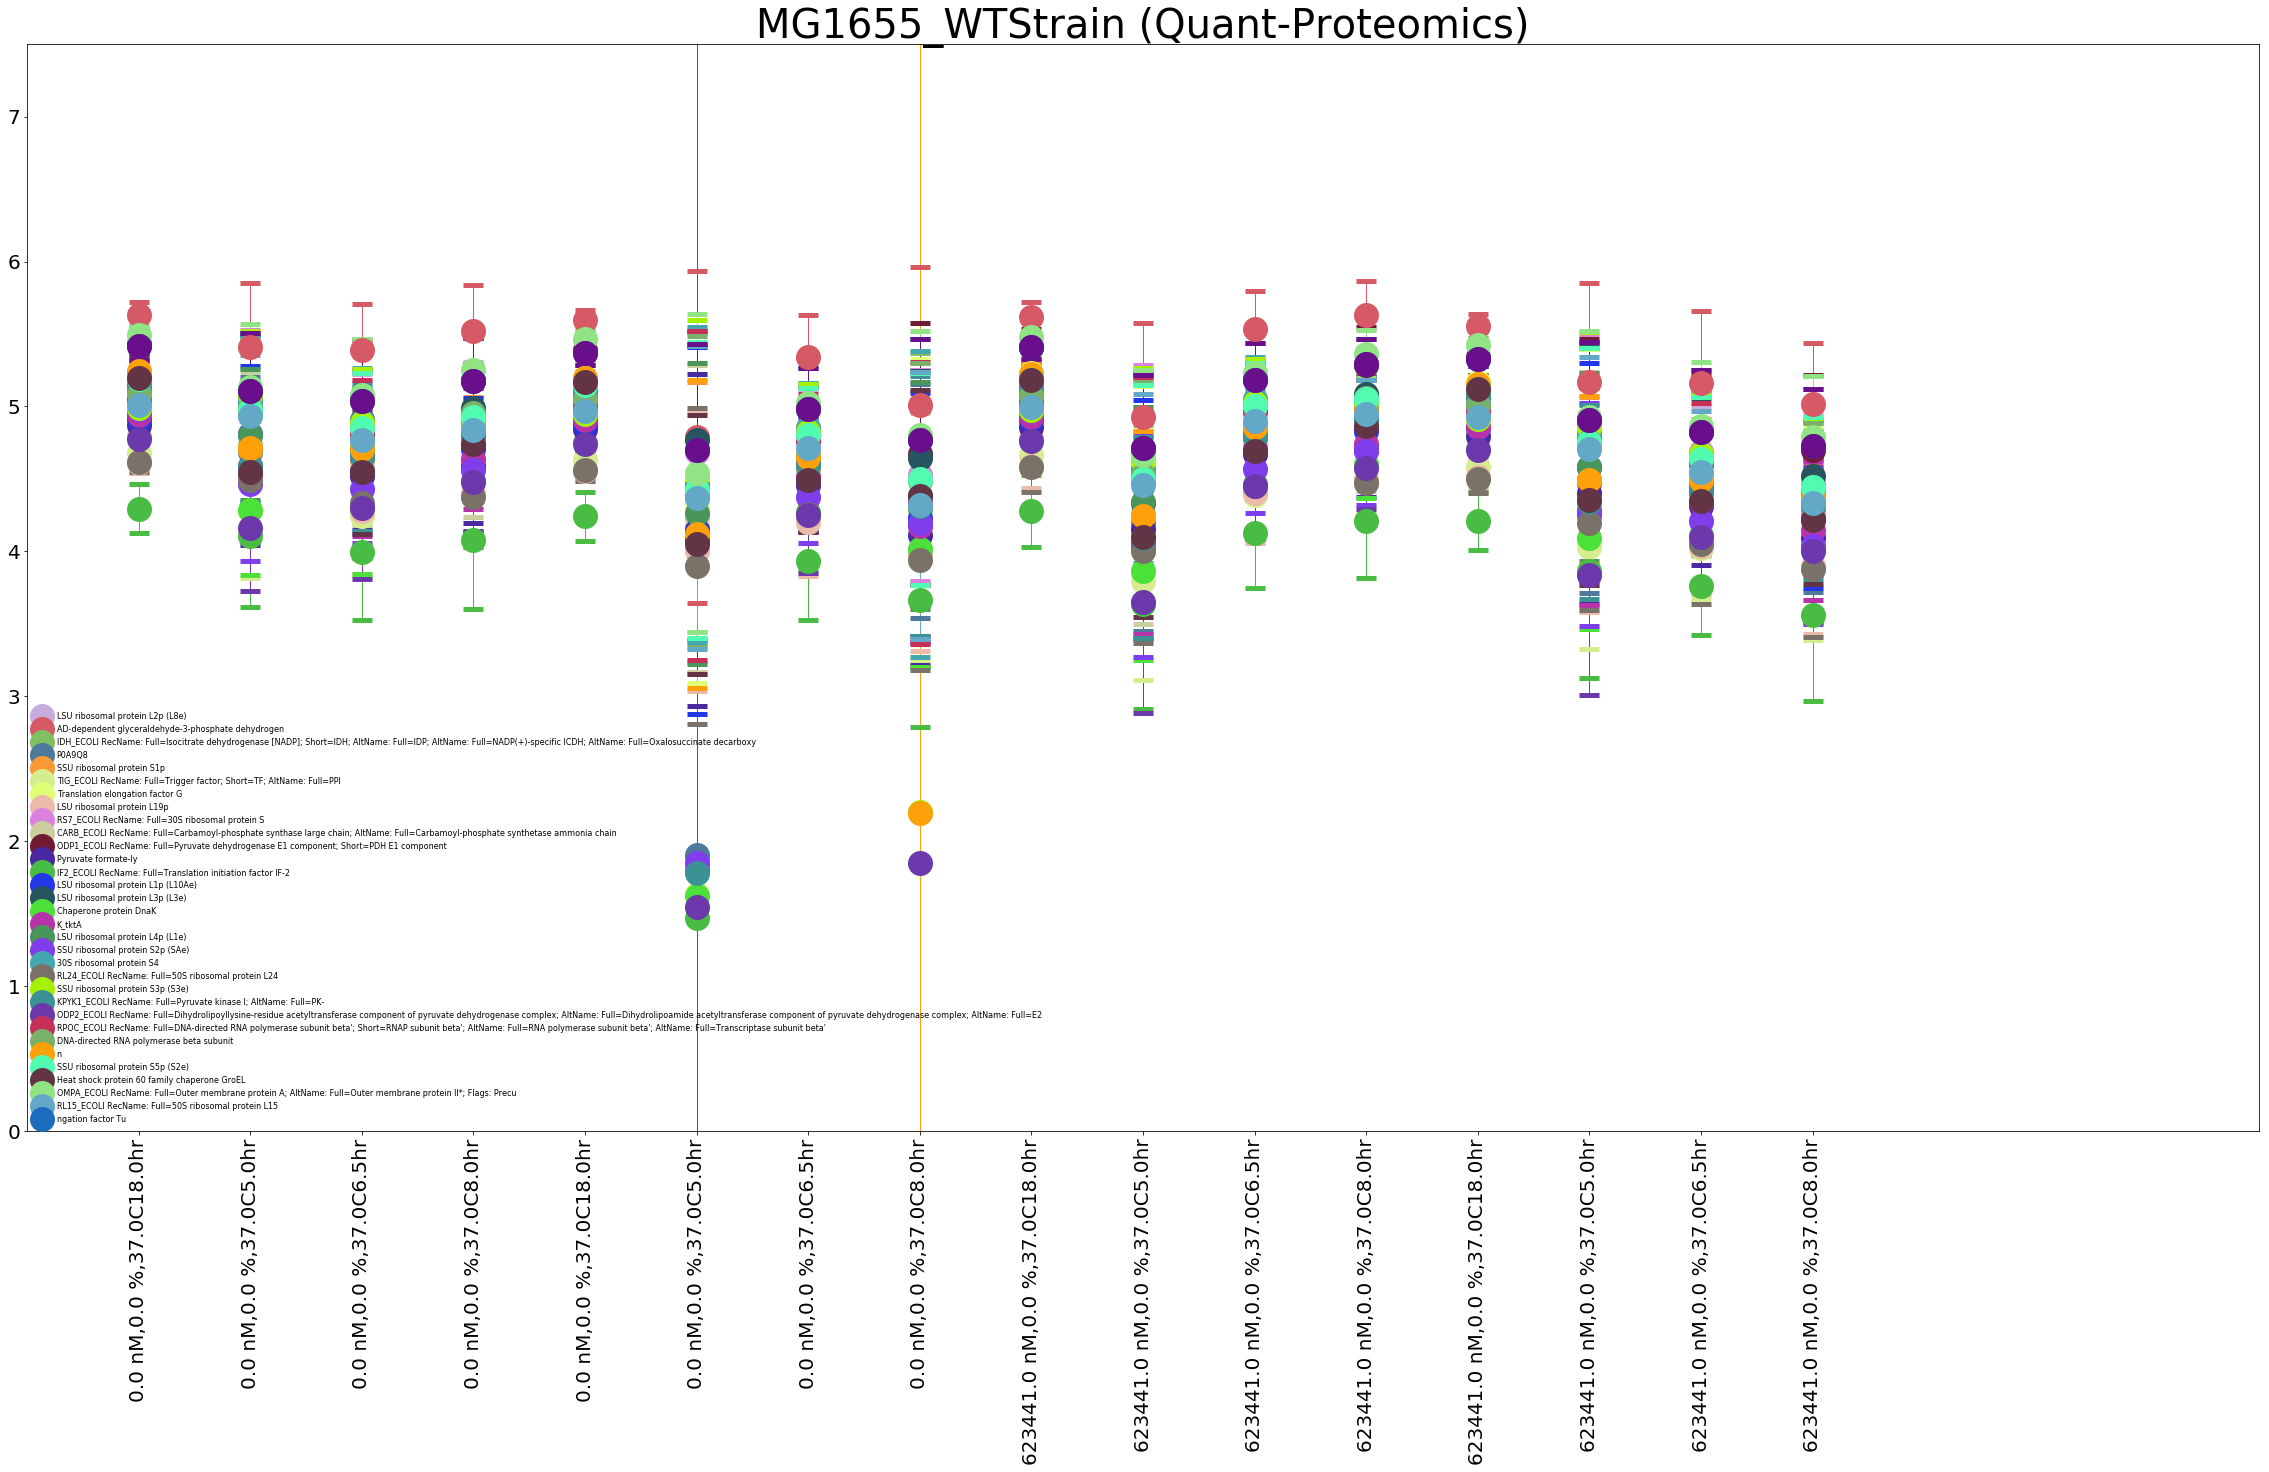

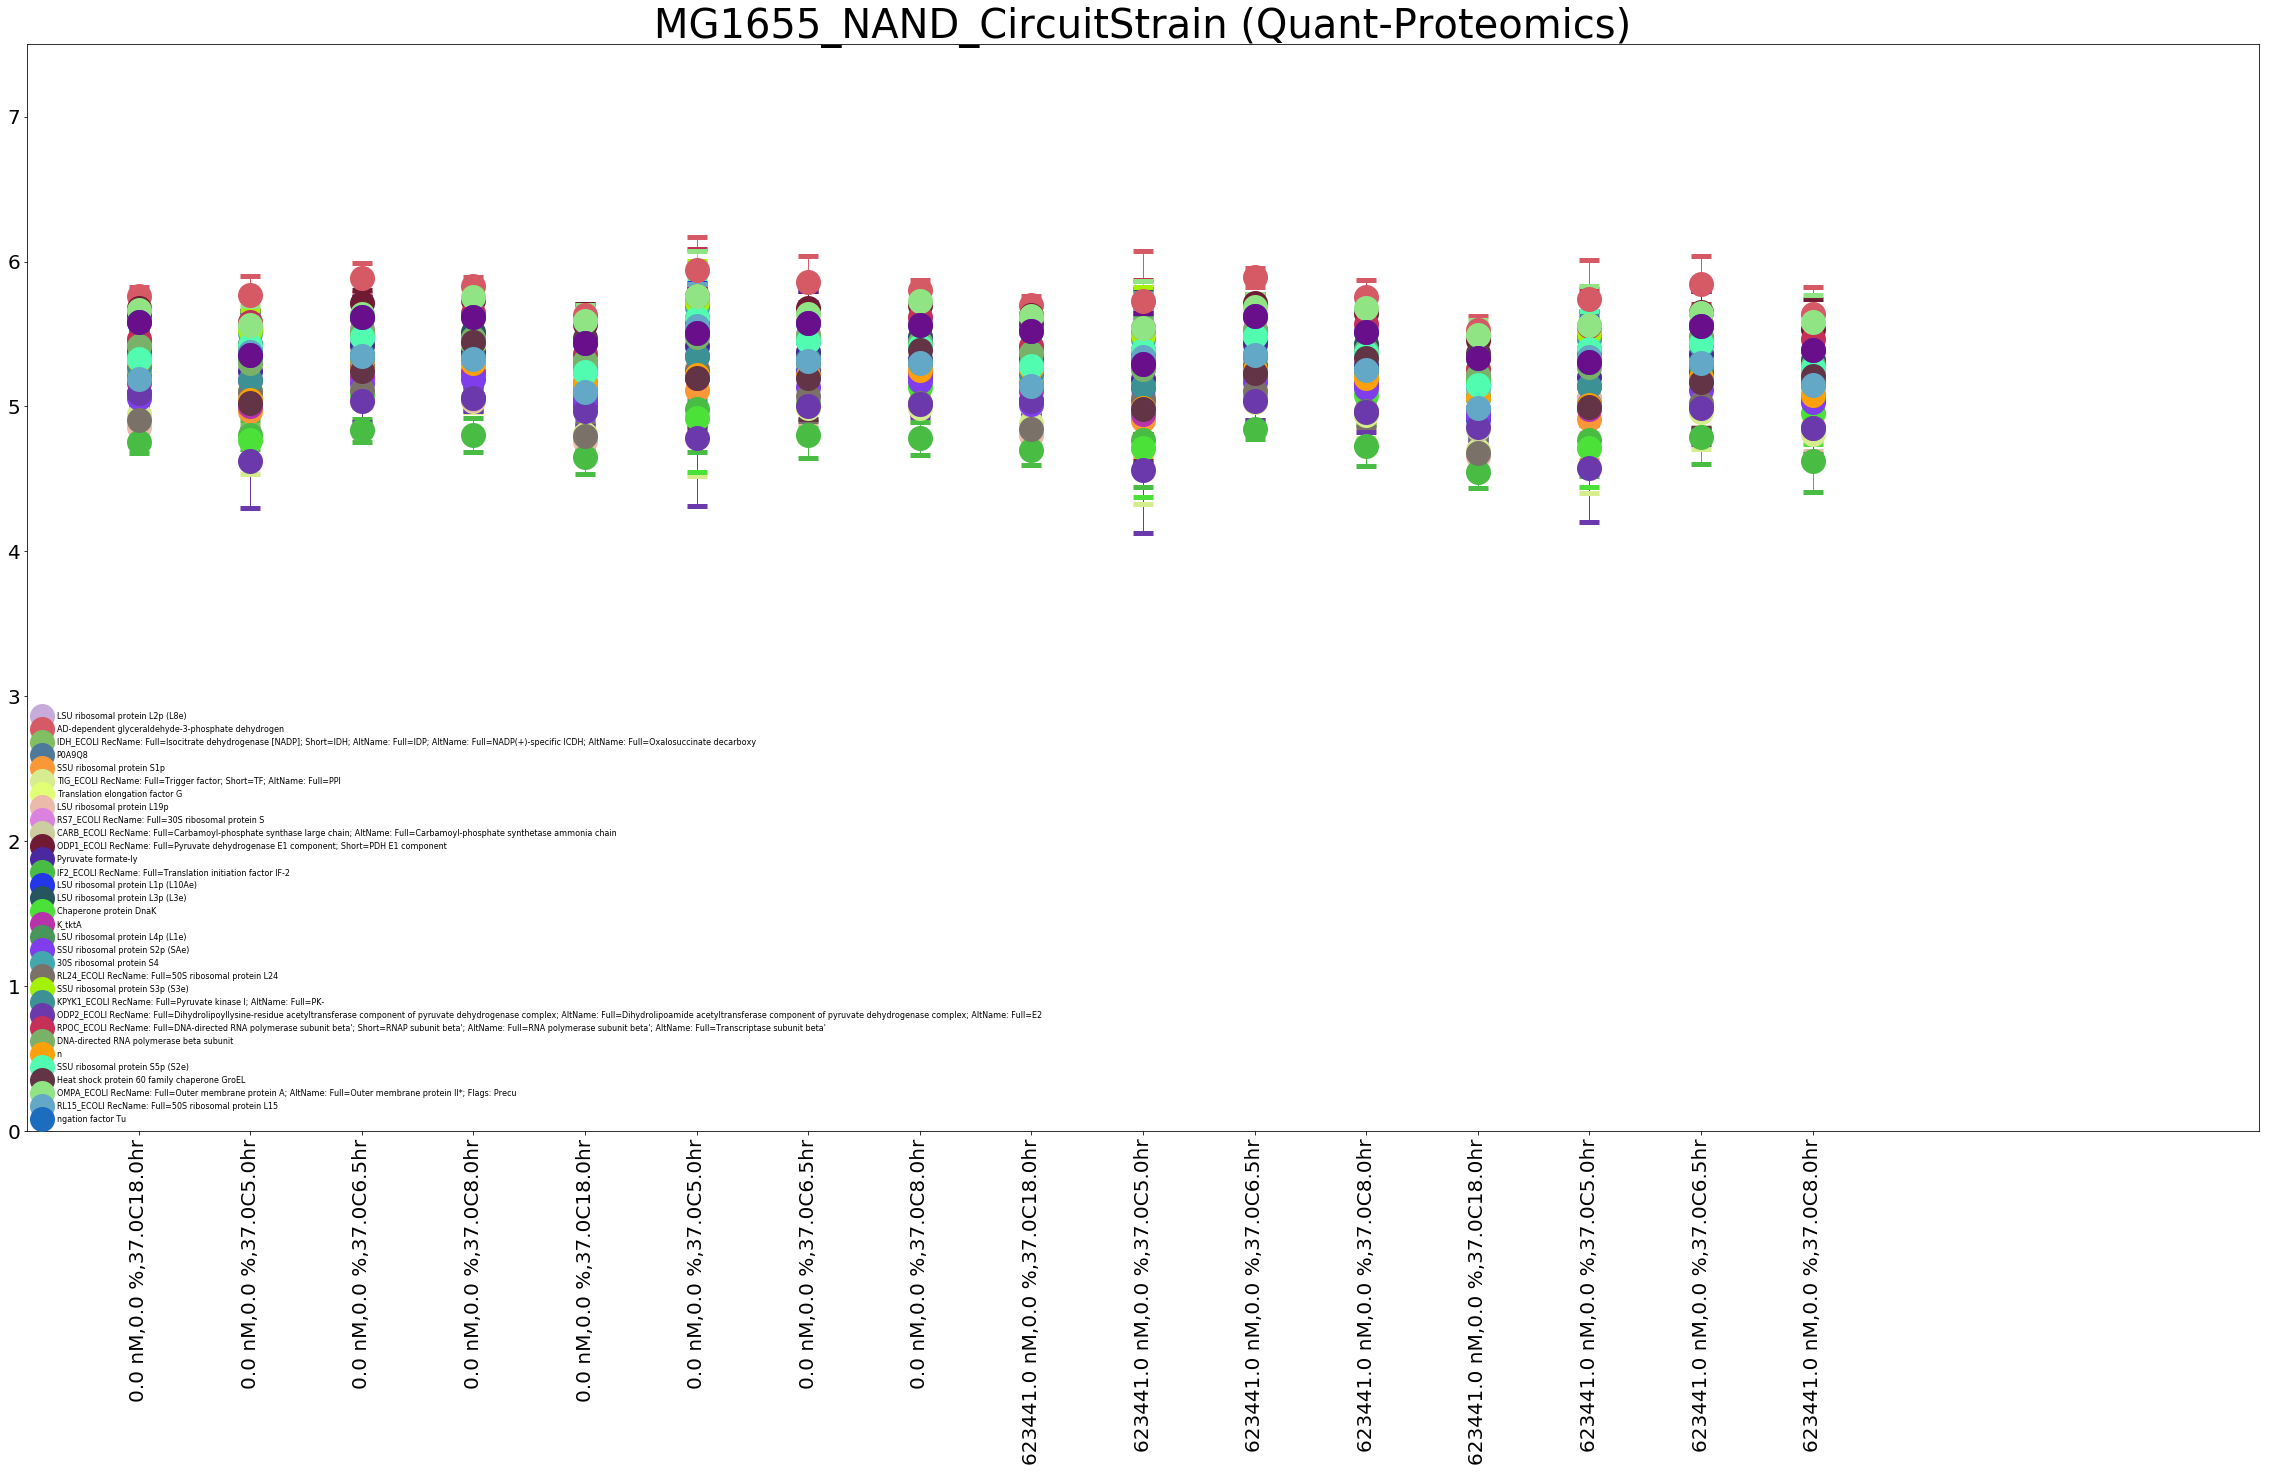

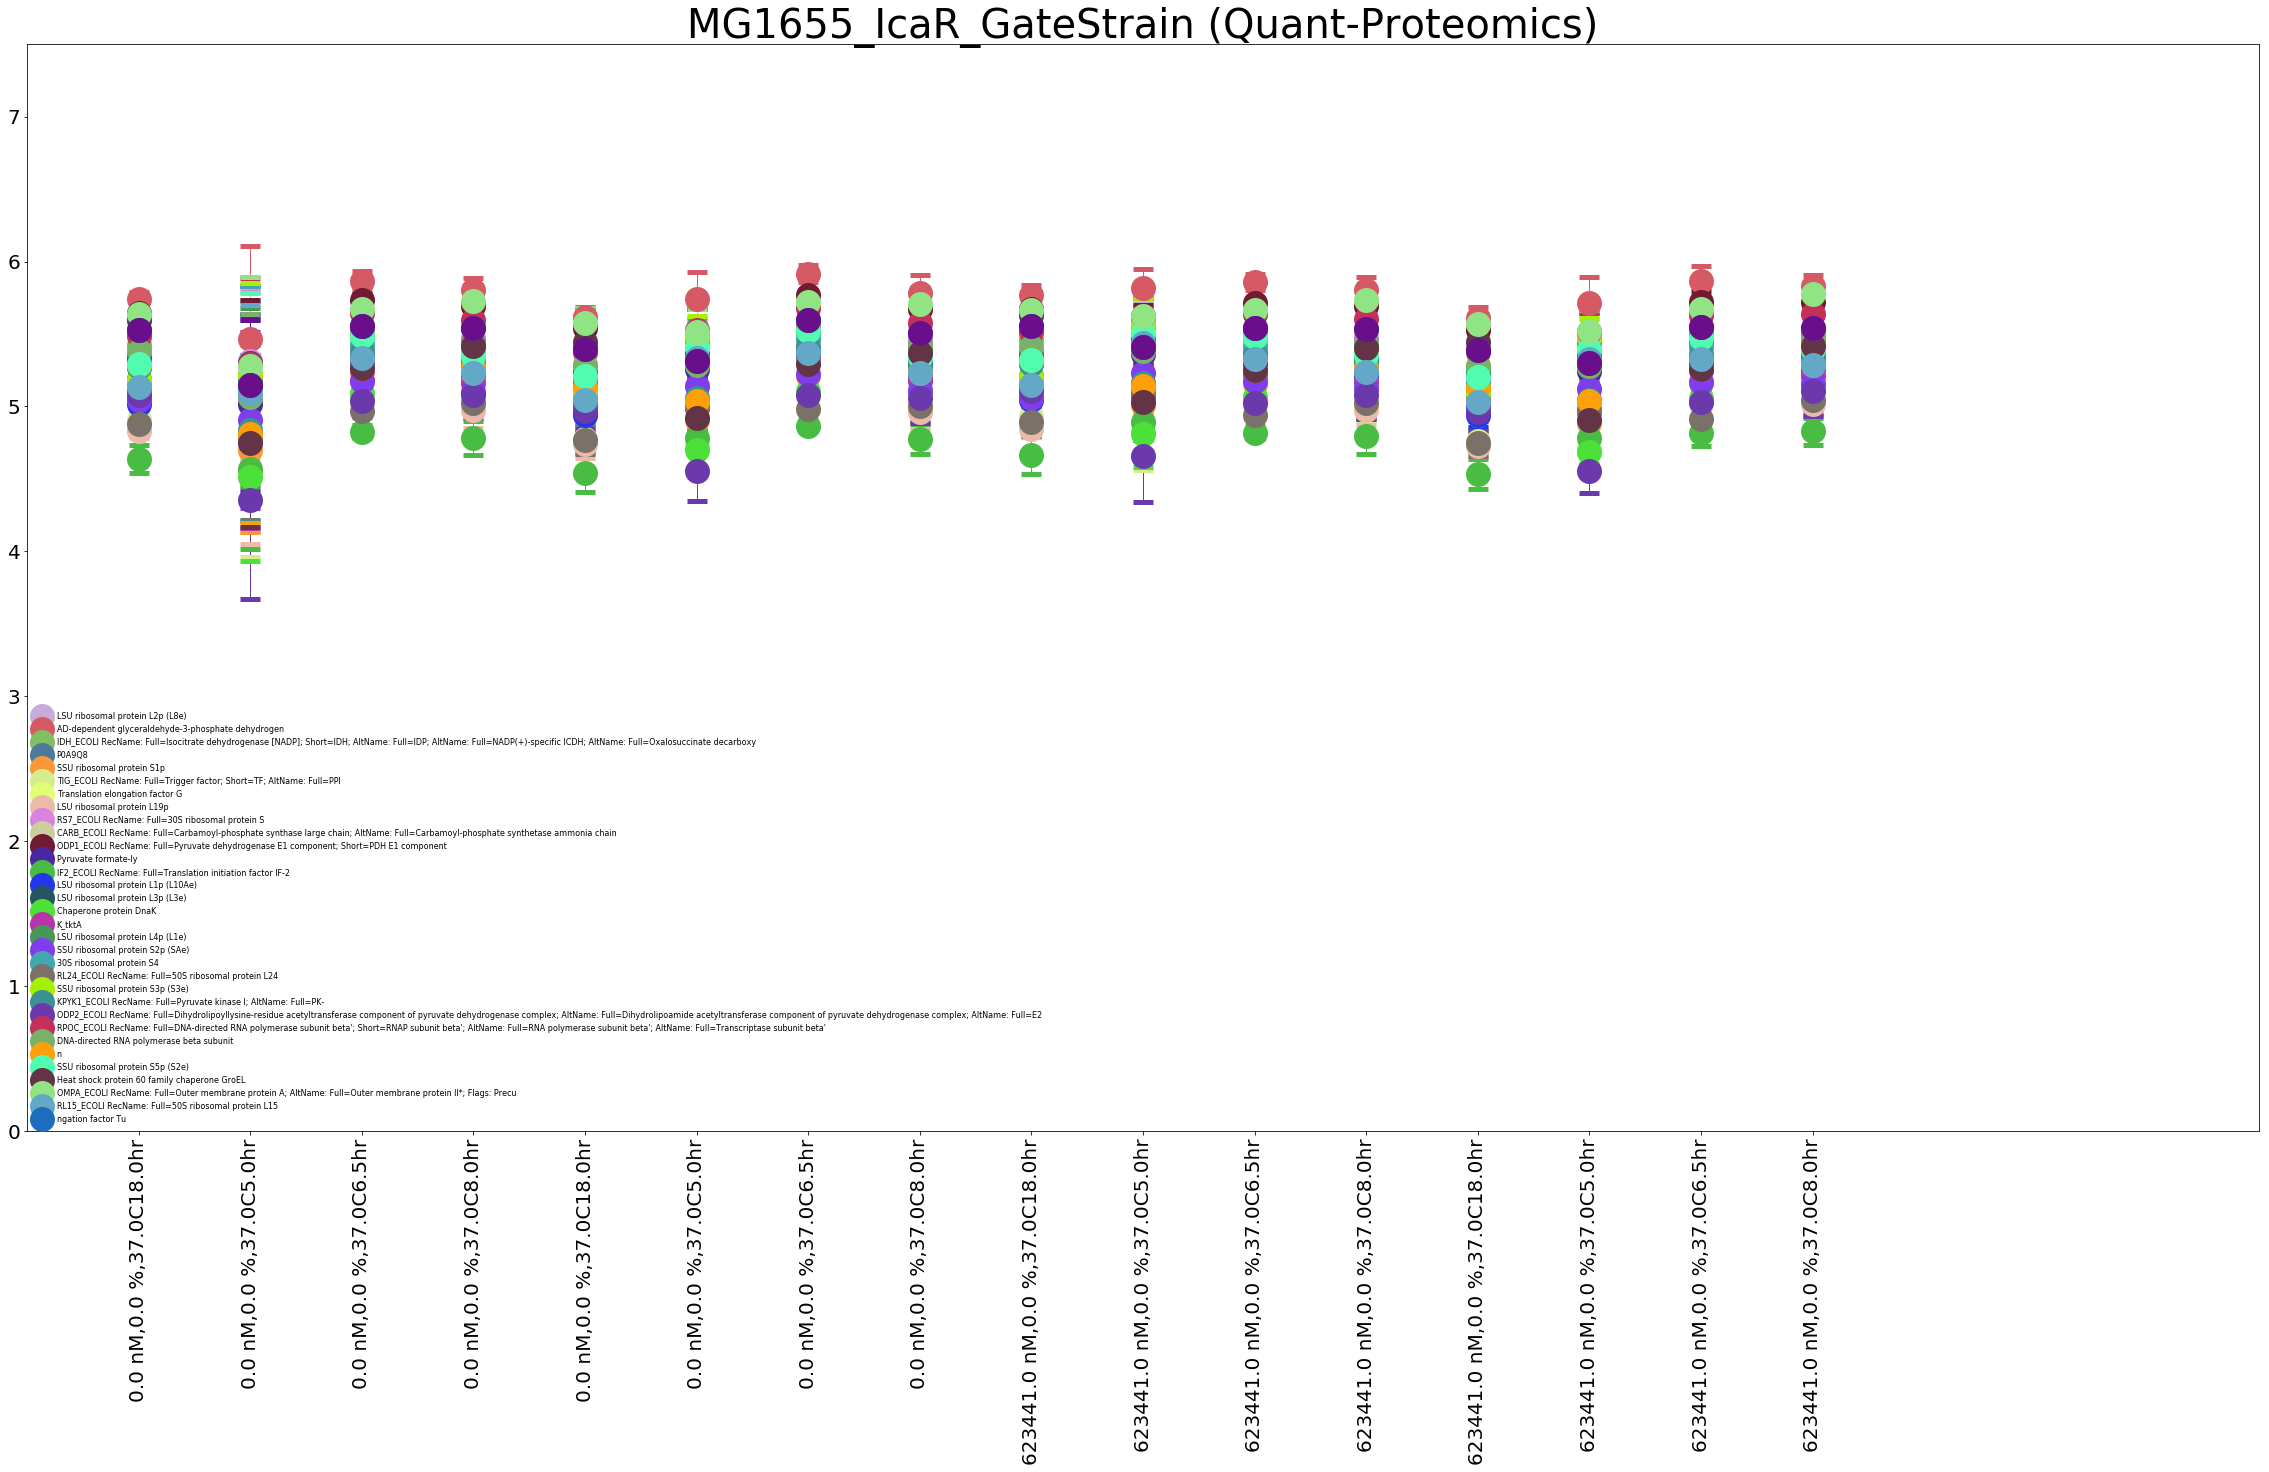

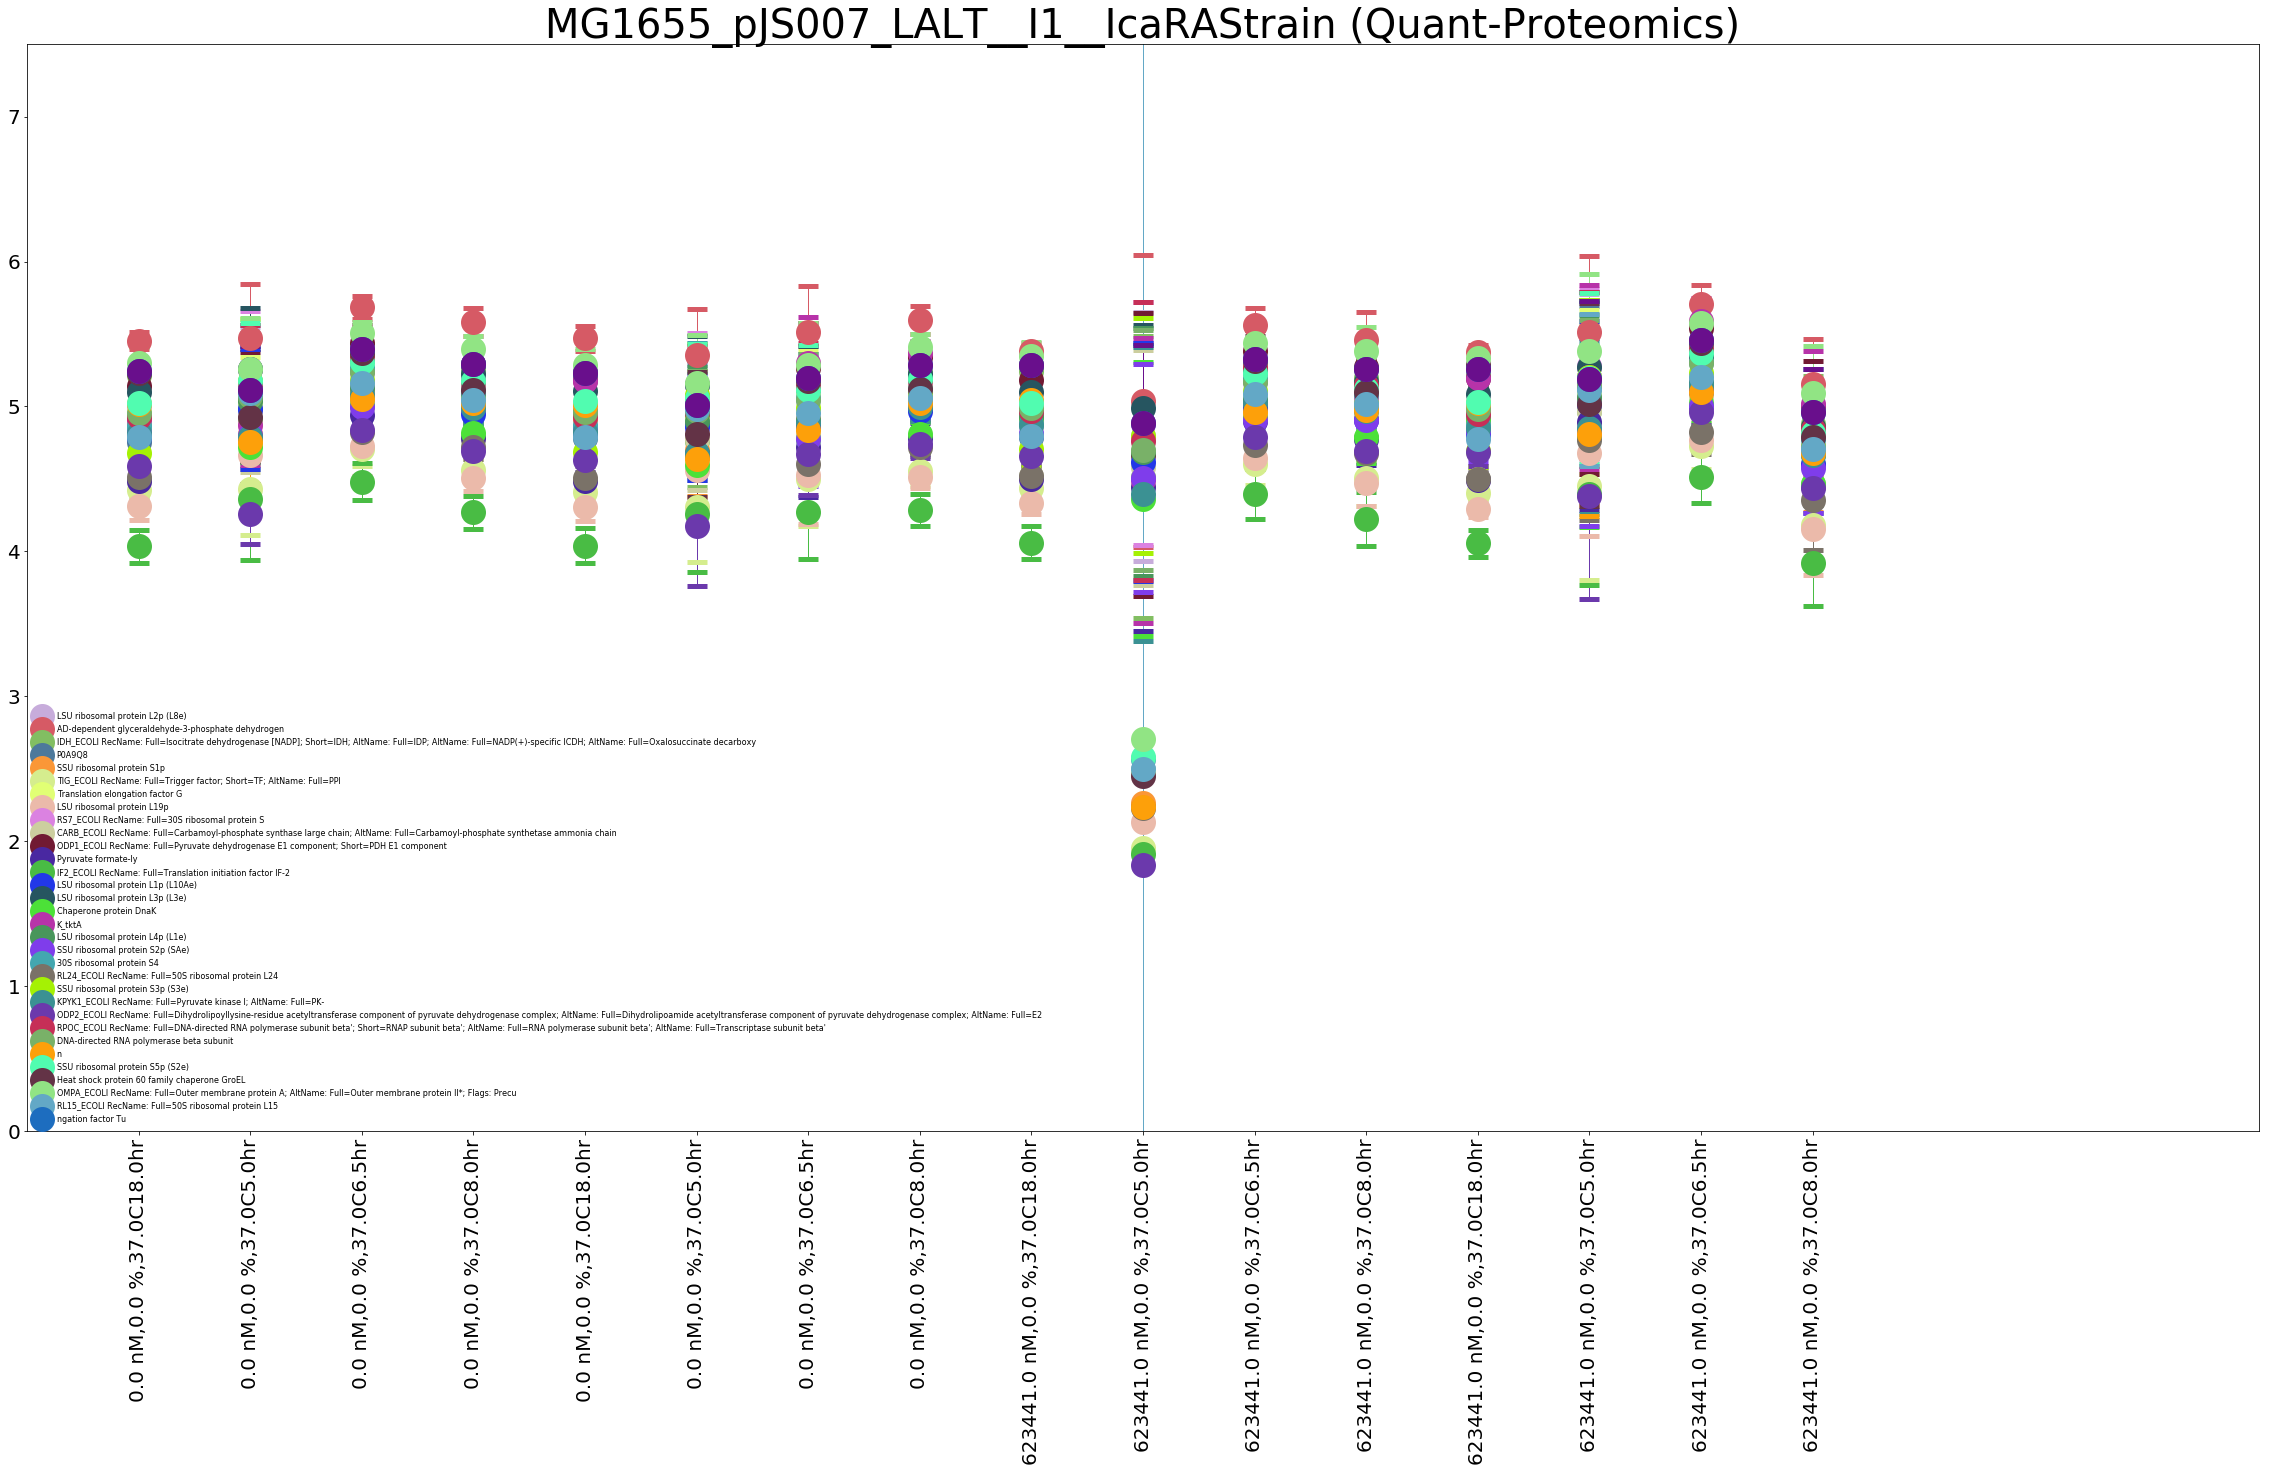

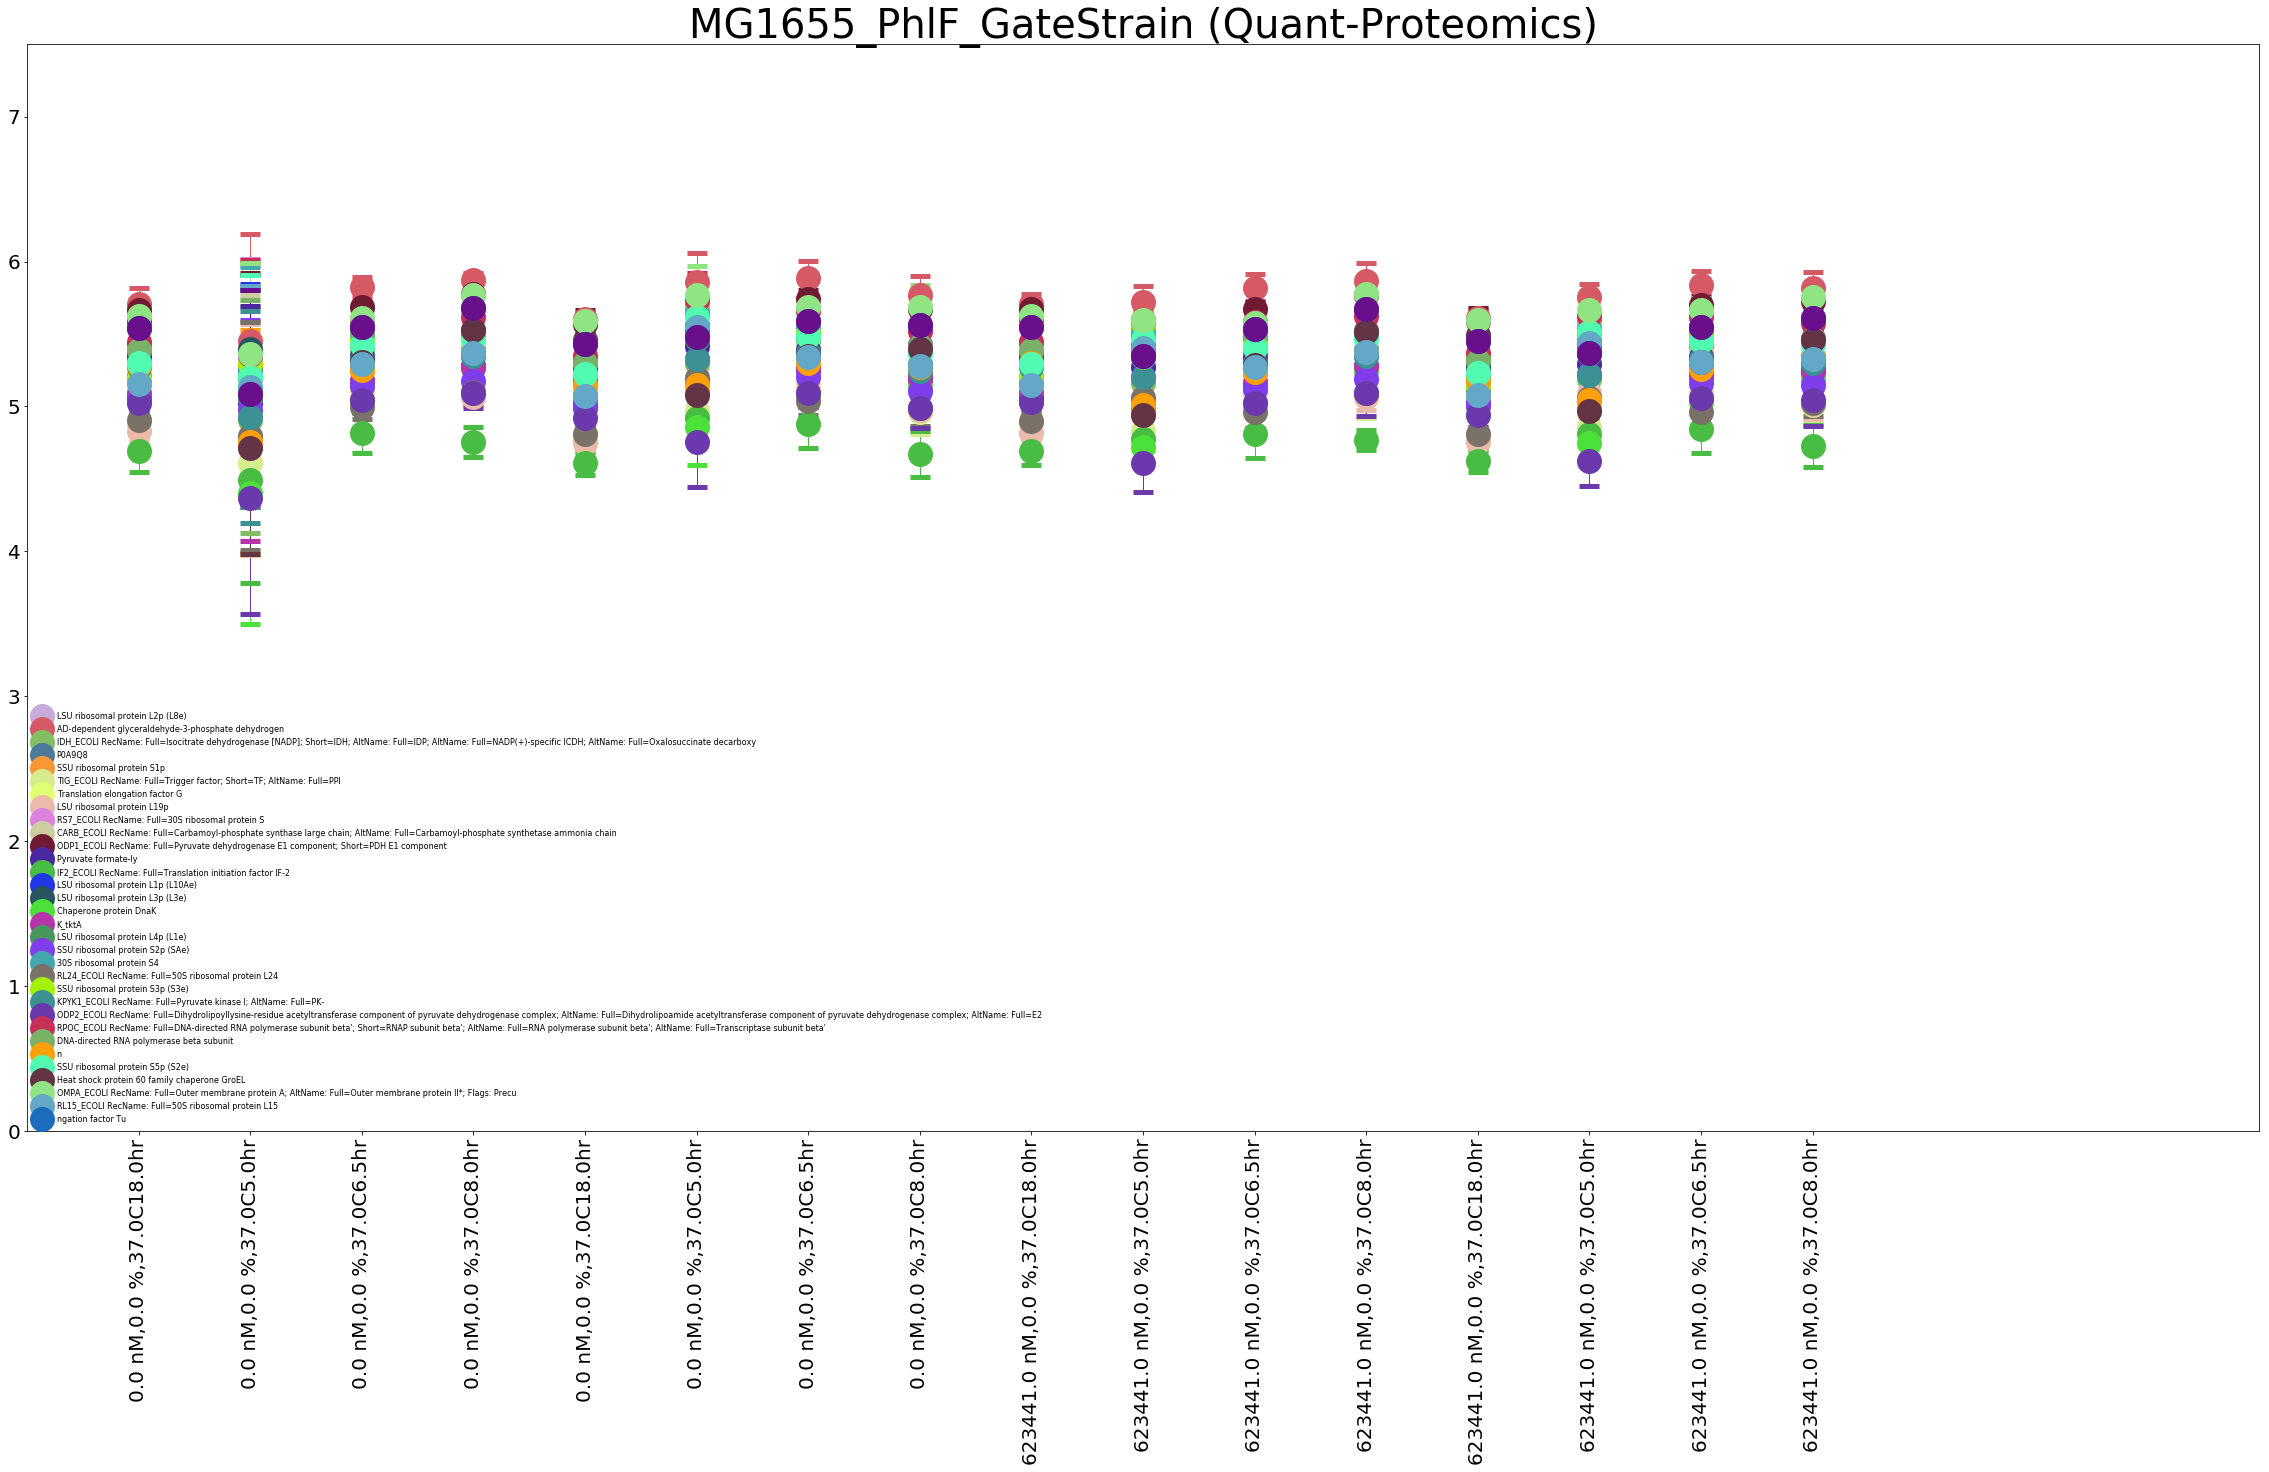

In [717]:

#print(all_gene_names)
all_strains = list(set(dataframe_condensed['strain']))
for this_strain in all_strains[0:]:
    plt.figure(figsize=(40,20))
    plt.ylim([-0.0,7.5])
    plt.xlim([0.0,20])
    this_strain_frame = dataframe_condensed[dataframe_condensed['strain']==this_strain]
    ics = list(set(this_strain_frame.IPTG_concentration));
    acs = list(set(this_strain_frame.arabinose_concentration));
    temps =list(set(this_strain_frame.temperature));
    times = list(set(this_strain_frame.timepoint));
    ics.sort();
    acs.sort();
    temps.sort();
    times.sort();
    
    all_conds = [];
    cond_pos =0;

    for this_iptg_conc in ics:
        for this_acs_conc in acs:
            for this_temp in temps:
                for this_time in times: 
                    this_data_frame = this_strain_frame[this_strain_frame['IPTG_concentration']==this_iptg_conc]
                    this_data_frame = this_data_frame[this_data_frame['arabinose_concentration']==this_acs_conc]
                    this_data_frame = this_data_frame[this_data_frame['temperature']==this_temp]
                    this_data_frame = this_data_frame[this_data_frame['timepoint']==this_time]
                    
                    this_data = this_data_frame.values
                    this_cond = np.str(np.round(np.float(this_iptg_conc)*1e9))+' nM,'+np.str(np.round(np.float(this_acs_conc)))+' %,' + this_temp + 'C'+this_time + 'hr'
                    all_conds.append(this_cond);
                    #print(list(set(this_data_frame.replicate)))
                    t_numeric_data = np.asarray(this_data[:,19:],dtype=np.float32)
                    t_numeric_data = np.log10(t_numeric_data + 1e-15)
                    #print(t_numeric_data.shape)
                    mean_vec = np.mean(t_numeric_data,axis=0)
                    std_vec = np.std(t_numeric_data,axis=0)
                    

                    

                    for gene_ind in range(0,t_numeric_data.shape[1]):
                        t_numeric_data[:,gene_ind]
                        plt.errorbar(x=cond_pos+1,y=mean_vec[gene_ind],yerr=std_vec[gene_ind],marker='.',ms=40,mew=5,color=gene_colors[:,gene_ind],elinewidth=1.0,capsize=10.0)
#                        plt.scatter(x,(np.log10(t_numeric_data[:,gene_ind])),alpha=1.0,s=40)
                    cond_pos = cond_pos+1;
    plt.xticks(ticks=np.arange(1,len(all_conds)+1,1),labels=all_conds,rotation=90)
    plt.title(this_strain + 'Strain (Quant-Proteomics)',size=40)                    
                        #
#                        
    h_leg = plt.legend(all_gene_names[0:-1],loc='lower left',fontsize=8,framealpha=0.0)    

    
                #
    
    
#    t_numeric_data = np.asarray(this_data[:,20:],dtype=np.float32);
#    import matplotlib.pyplot as plt 
#    x = np.arange(1,t_numeric_data.shape[0]+1,1)
#    for gene_ind in range(0,t_numeric_data.shape[1]):
#        t_numeric_data[:,gene_ind]
#        plt.scatter(x,(np.log10(t_numeric_data[:,gene_ind])),alpha=1.0,s=40)
#        plt.xticks(ticks=x,labels=all_conds,rotation=90)
#        #plt.ylim([-0.1,0.8])
#        plt.xlim([0.0,64])
#    #h_leg = plt.legend(all_gene_names[0:-1],loc='upper left',fontsize=18,framealpha=0.0)    
#    #h_leg.facecolor='w'
    
#    plt.title(this_strain + 'Strain (Quant-Proteomics)',size=40)